This is the part I of a series.

writing plan:
- part I: demonstrate the importance of preprococessing (i.e. scaling) before using PCA. Point out that the preprocessing tools should not be limited to standardscaler, because it might not be able to handle data with outliers.
- part II: discuss about whether PCA can be used for dataset with categorical data, if so, how? We will compare the tools we discuss in part I and estimate their performance in this situation.
- part III: what role PCA plays in the machine learning pipeline, i.e. we will see PCA can be used for dimenionality reduction helping data visualization in part I. In this part III, we will discuss how PCA is generally helpful for supervised learning and unsupervised learning thanks to its ability of data whitening.

# Motivation
- Data preprocessing is an essential part of machine learning pipeline. Data preprocessing sometimes overlaps concept of data wraggling, feature engineering. Today we will focus on the subtopic of data scaling/transformation. 
- StandScaler, MinMaxScaler are some data preprocessing tools you probabely have heard of. In fact, Sklearn's preprocssing module are exclusive to data scaling/transformaiton tools. 
- We know that data preprocessing is important. But it is still not very clear  when and which scalers/transformerers to use. i.e. This post is motivated by a [Sklearn's tutorial](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). We might have been suggested to perform some sort of data scaling before PCA, and many people used StandardScaler, but is it the best choice?

With the convention from Sklearn, scalers like StandardScaler are usually called linear scalers, while the transforms like PowerTransformer are called non-linear scalers.

# Things you will learn
- To understand the challenge for data engineering and how data transformation can help to deal with messy data, i.e. StandardScaler, MaxAbsScaler, MaxAbsScaler, etc
- What PCA can do, how to perform PCA, especially how to preprocess data for PCA. 
- To answer the question, can PCA handel categorical data? If so, how?

In [3]:
# load packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_wine, fetch_california_housing

RANDOM_STATE = 2020

In [455]:
# version check
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import sklearn

print('numpy={}'.format(np.__version__))
print('seaborn={}'.format(sns.__version__))
print('pandas={}'.format(pd.__version__))
print('matplotlib={}'.format(matplotlib.__version__))
print('sklearn={}'.format(sklearn.__version__))

numpy=1.18.1
seaborn=0.10.0
pandas=1.0.1
matplotlib=3.1.3
sklearn=0.22.1


In [77]:
# customer function
# comparing differt transformers
def transformer_bundle(X_train):

    transformer_list = ['NoTransformer', 'StandardScaler', 'QuantileTransformer', 'RobustScaler', 'Normalizer', 
                        'MaxAbsScaler', 'MinMaxScaler', 'PowerTransformer']

    X_train_backup = X_train.copy()

    X_train_trans_list= []   
    X_train_pca_list = []
    for i in range(len(transformer_list)):
        X_train = X_train_backup.copy()
        if i ==0:
            pass
        elif i ==1:    
            ss = StandardScaler()
            X_train = ss.fit_transform(X_train)
        elif i ==2:
            qt = QuantileTransformer()
            X_train = qt.fit_transform(X_train)
        elif i ==3:
            rs = RobustScaler()
            X_train = rs.fit_transform(X_train)
        elif i ==4:
            nl = Normalizer()
            X_train = nl.fit_transform(X_train)
        elif i ==5:
            mas = MaxAbsScaler()
            X_train = mas.fit_transform(X_train)
        elif i ==6:
            mms = MinMaxScaler()
            X_train = mms.fit_transform(X_train)
        elif i ==7:
            pt = PowerTransformer()
            X_train = pt.fit_transform(X_train)

        X_train_trans_list.append(np.array(X_train))
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_list.append(np.array(X_train_pca))
        
    return X_train_trans_list, X_train_pca_list

In [329]:
# customer function
# pca scatter plot
def pca_scatter_plot(X_train_pca_list, y_train, index_list):
    transformer_list = ['NoTransformer', 'StandardScaler', 'QuantileTransformer', 'RobustScaler', 'Normalizer', 
                        'MaxAbsScaler', 'MinMaxScaler', 'PowerTransformer']
#     y_train_types = ['target_original', 'target_small_missinng', 'target_large_missinng', 'target_all_missinng']
    y_train_types = ['target_small_missinng', 'target_large_missinng', 'target_all_missinng']
    y_train_title = ['few label missing', 'many label missing', 'no label']

    fig, ax = plt.subplots(len(transformer_list), 3, figsize=(20, 40))
    for i in range(len(transformer_list)):
        X_train_pca = X_train_pca_list[i]

        for y_training_index in range(len(y_train_types)):        
            sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], #label='label',
                                 hue=y_train[y_train_types[y_training_index]][index_list].values, 
                            hue_order=target_order,
    #                         style=y_train[index_list], 
                            alpha=0.6, 
                            palette=customer_palette,
    #                         palette=sns.color_palette("Set1", 3),
                                ax = ax[i,y_training_index])

            ax[i,y_training_index].set_title('{} ({})'.format(transformer_list[i], 
                                                            y_train_title[y_training_index]),
                                            loc='left')
            ax[i,y_training_index].legend(loc='upper right')
#             ax[i,1].legend(loc='upper right')

In [18]:
# customer palette for visulization color code
customer_palette = sns.color_palette('Set1', 3)
customer_palette.append(sns.xkcd_palette(['greyish'])[0])
# customer_palette
# sns.xkcd_palette(['greyish'])

# About the data
We will use the [wine data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) as follows.

This is a legend dataset. "The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the [three types(origins) of wine](https://archive.ics.uci.edu/ml/datasets/Wine).


In [370]:
data_bunch = load_wine()
df_features = pd.DataFrame(data_bunch.data)
df_features.columns = data_bunch.feature_names

df_target = pd.DataFrame({'target_original':data_bunch.target})
# create a partial target column
df_target['target_small_missinng'] = pd.DataFrame({'target_original':data_bunch.target})
df_target.loc[df_target.sample(frac=0.06, random_state=RANDOM_STATE).index, 'target_small_missinng'] = -1
df_target['target_large_missinng'] = pd.DataFrame({'target_original':data_bunch.target})
df_target.loc[df_target.sample(frac=0.6, random_state=RANDOM_STATE).index, 'target_large_missinng'] = -1
df_target['target_all_missinng'] = -1

df_wine = pd.concat([df_features, df_target], axis=1)

target_order = [0,1,2,-1]

df_wine


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target_original  \
0                            3.92   1065.0                0   
1                            3.40   1050.0                0   
2                            3.17   1185.0                0   
3                            3.45   1480.0                0   
4                            2.93    735.0                0   
..                            ...      ...              ...   
173                          1.74    740.0                2   
174                          1.56    750.0                2   
175                          1.56    835.0                2   
176                          1.62    840.0                2   
177                          1.60    560.0                2   

     target_small_missinng  target_large_missinng  target_all_missinng  
0                        0                     -1                   -1  
1                        0                     -1                   -1  
2                        0                     -1                   -1  
3                        0                     -1                   -1  
4                        0                     -1                   -1  
..                     ...                    ...                  ...  
173                      2                     -1                   -1  
174                      2                     -1                   -1  
175                      2                     -1                   -1  
176                      2                      2                   -1  
177                     -1                     -1                   -1  

[178 rows x 17 columns]

# About the task
- As you can see the target of the wine dataset has three labels, so this would be a classification problem.
- You might also have noticed I made some modification of the dataset and create two target columns, one with small amount of labels missing, one with large amount of labels missing. In this way we can mimic the situations of supervised learning, semi-supervised learning respectively. 
- The reasoning behind would be clearer very soon. First, let's play with the data and get to know more about it.

# Explortary data analysis (EDA)
The data is very clean. And all the features are numerical variables. This will save us a lot of trouble. Using seaborn's [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) would do the job for us.

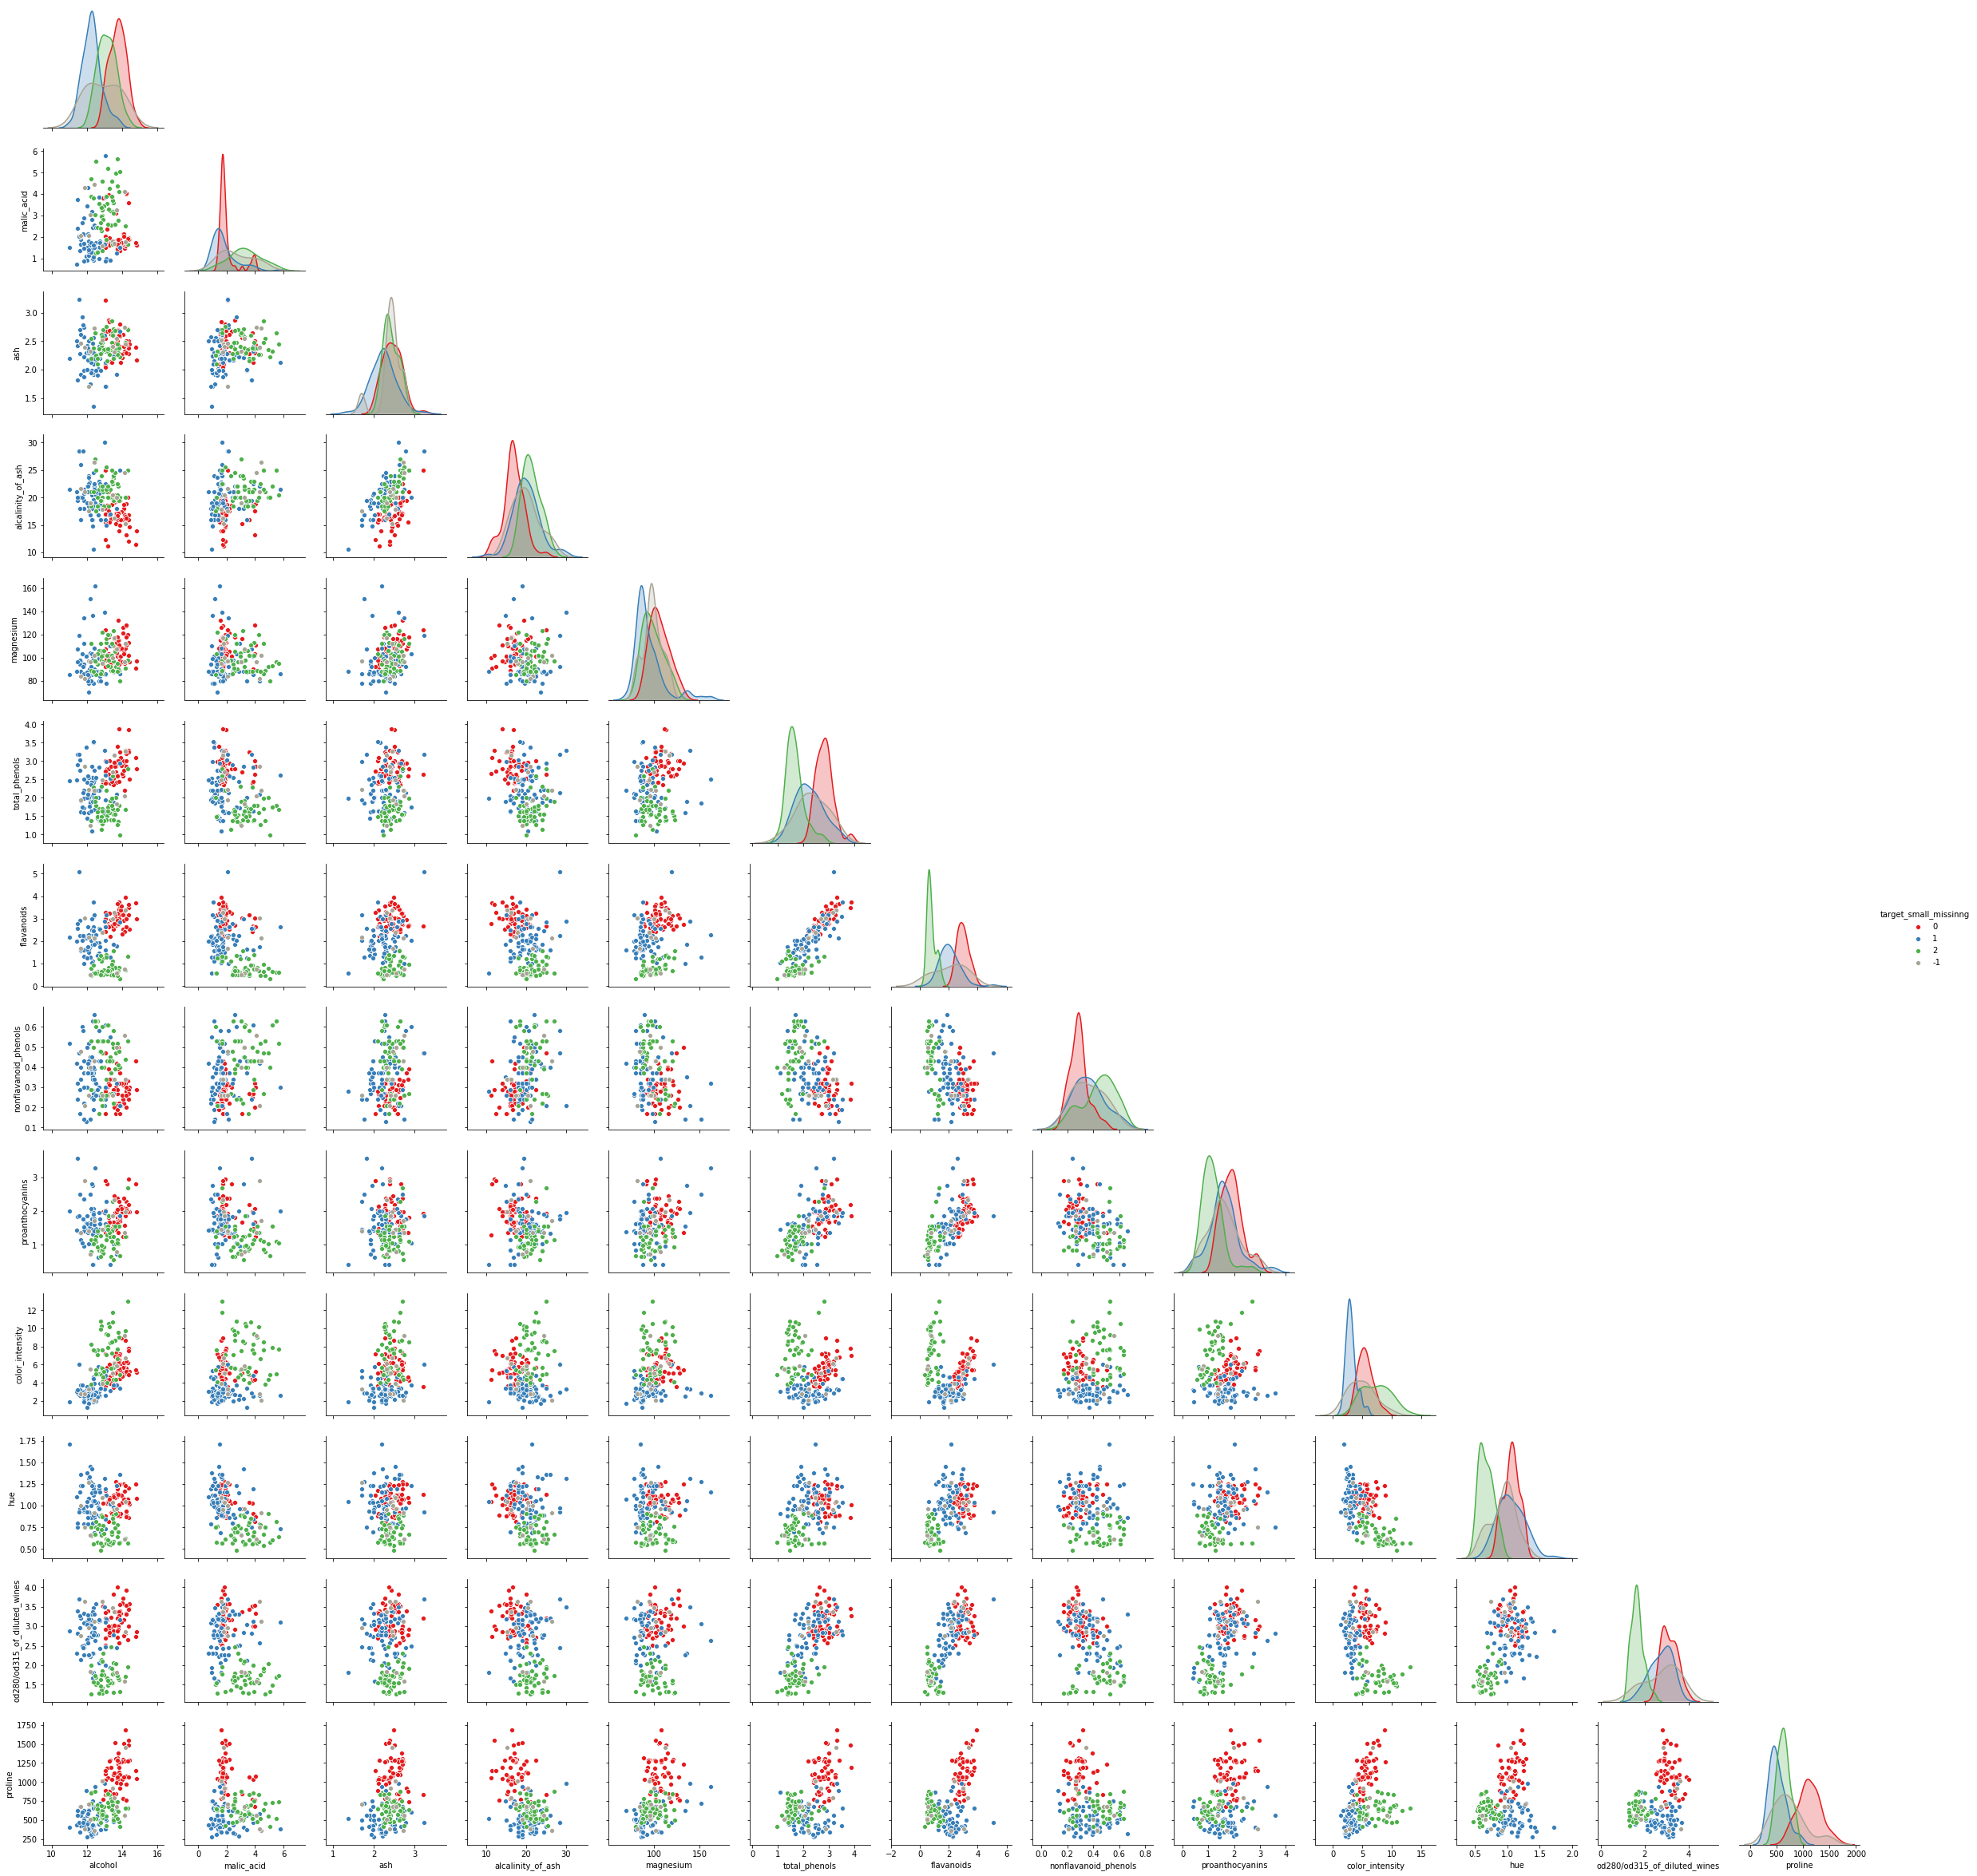

In [434]:
g = sns.pairplot(data=df_wine, vars=df_features.columns, hue='target_small_missinng',
                 corner=True, palette=customer_palette, hue_order=target_order)

In [429]:
handles

dict_values([<matplotlib.collections.PathCollection object at 0x000001D66CAC5308>, <matplotlib.collections.PathCollection object at 0x000001D66CAAEC08>, <matplotlib.collections.PathCollection object at 0x000001D66CAB4D48>, <matplotlib.collections.PathCollection object at 0x000001D66CA9DA88>])

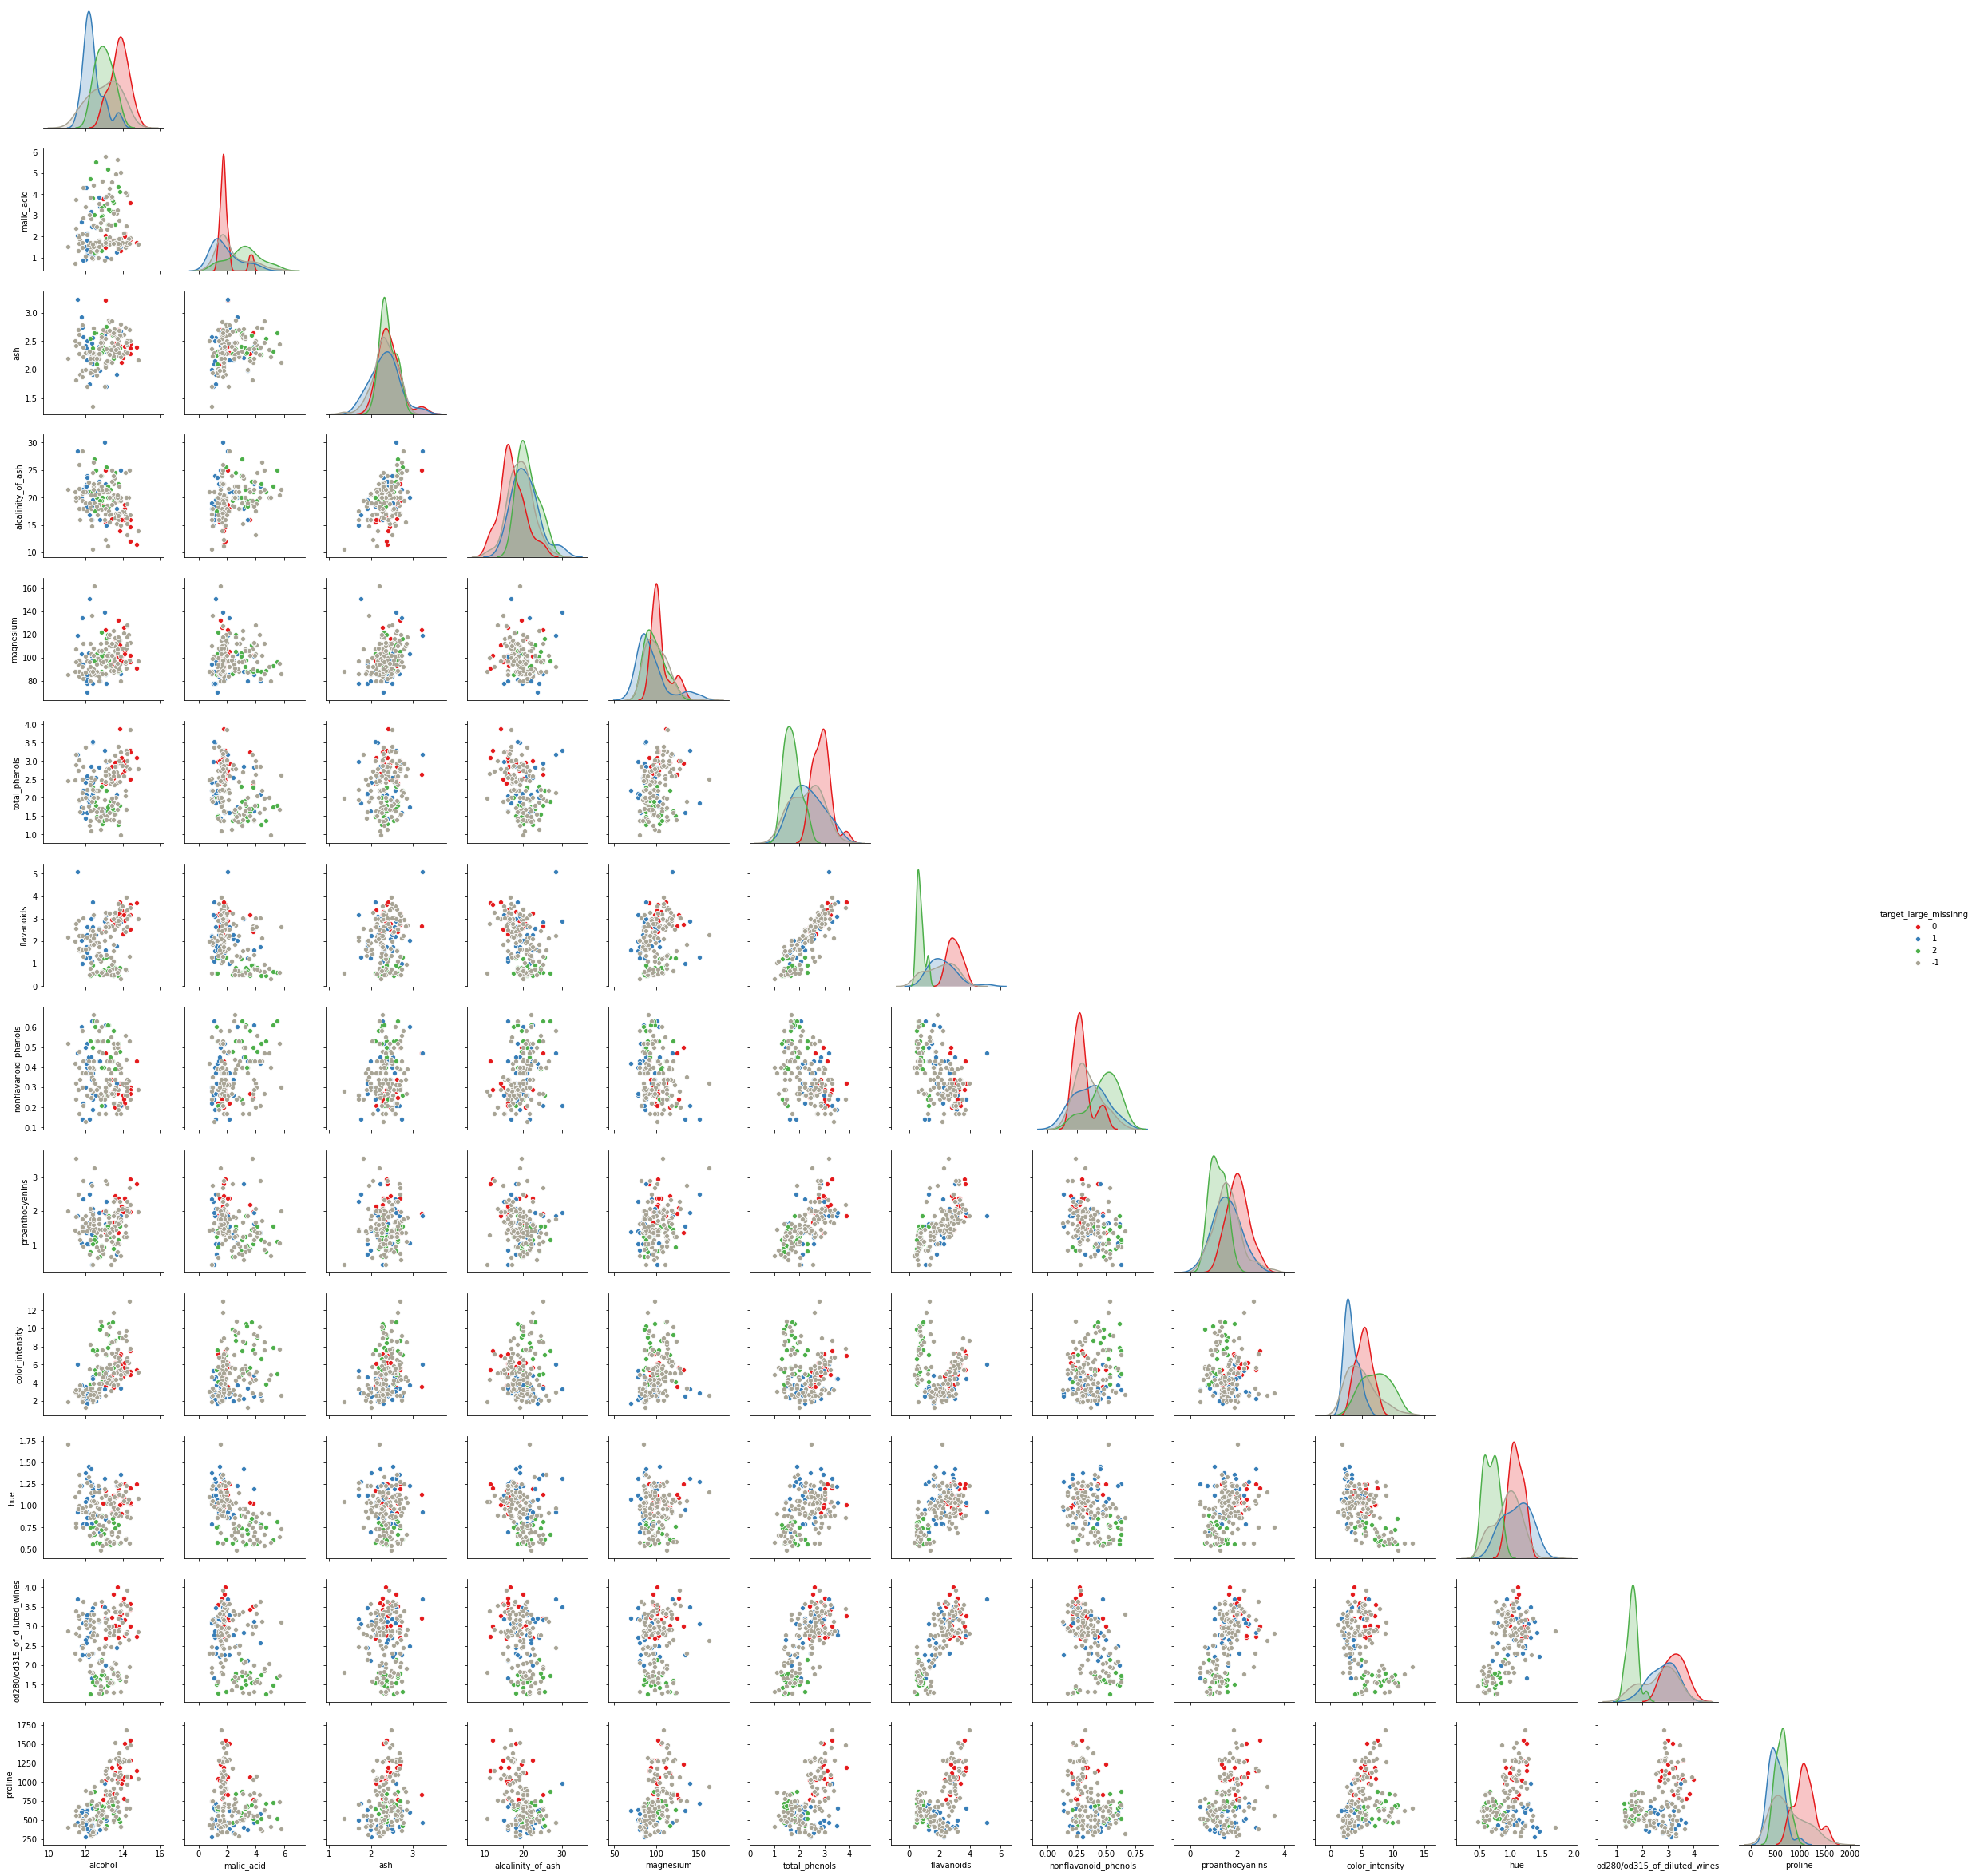

In [372]:
g = sns.pairplot(data=df_wine, vars=df_features.columns, hue='target_large_missinng', 
                 corner=True, palette=customer_palette, hue_order=target_order)

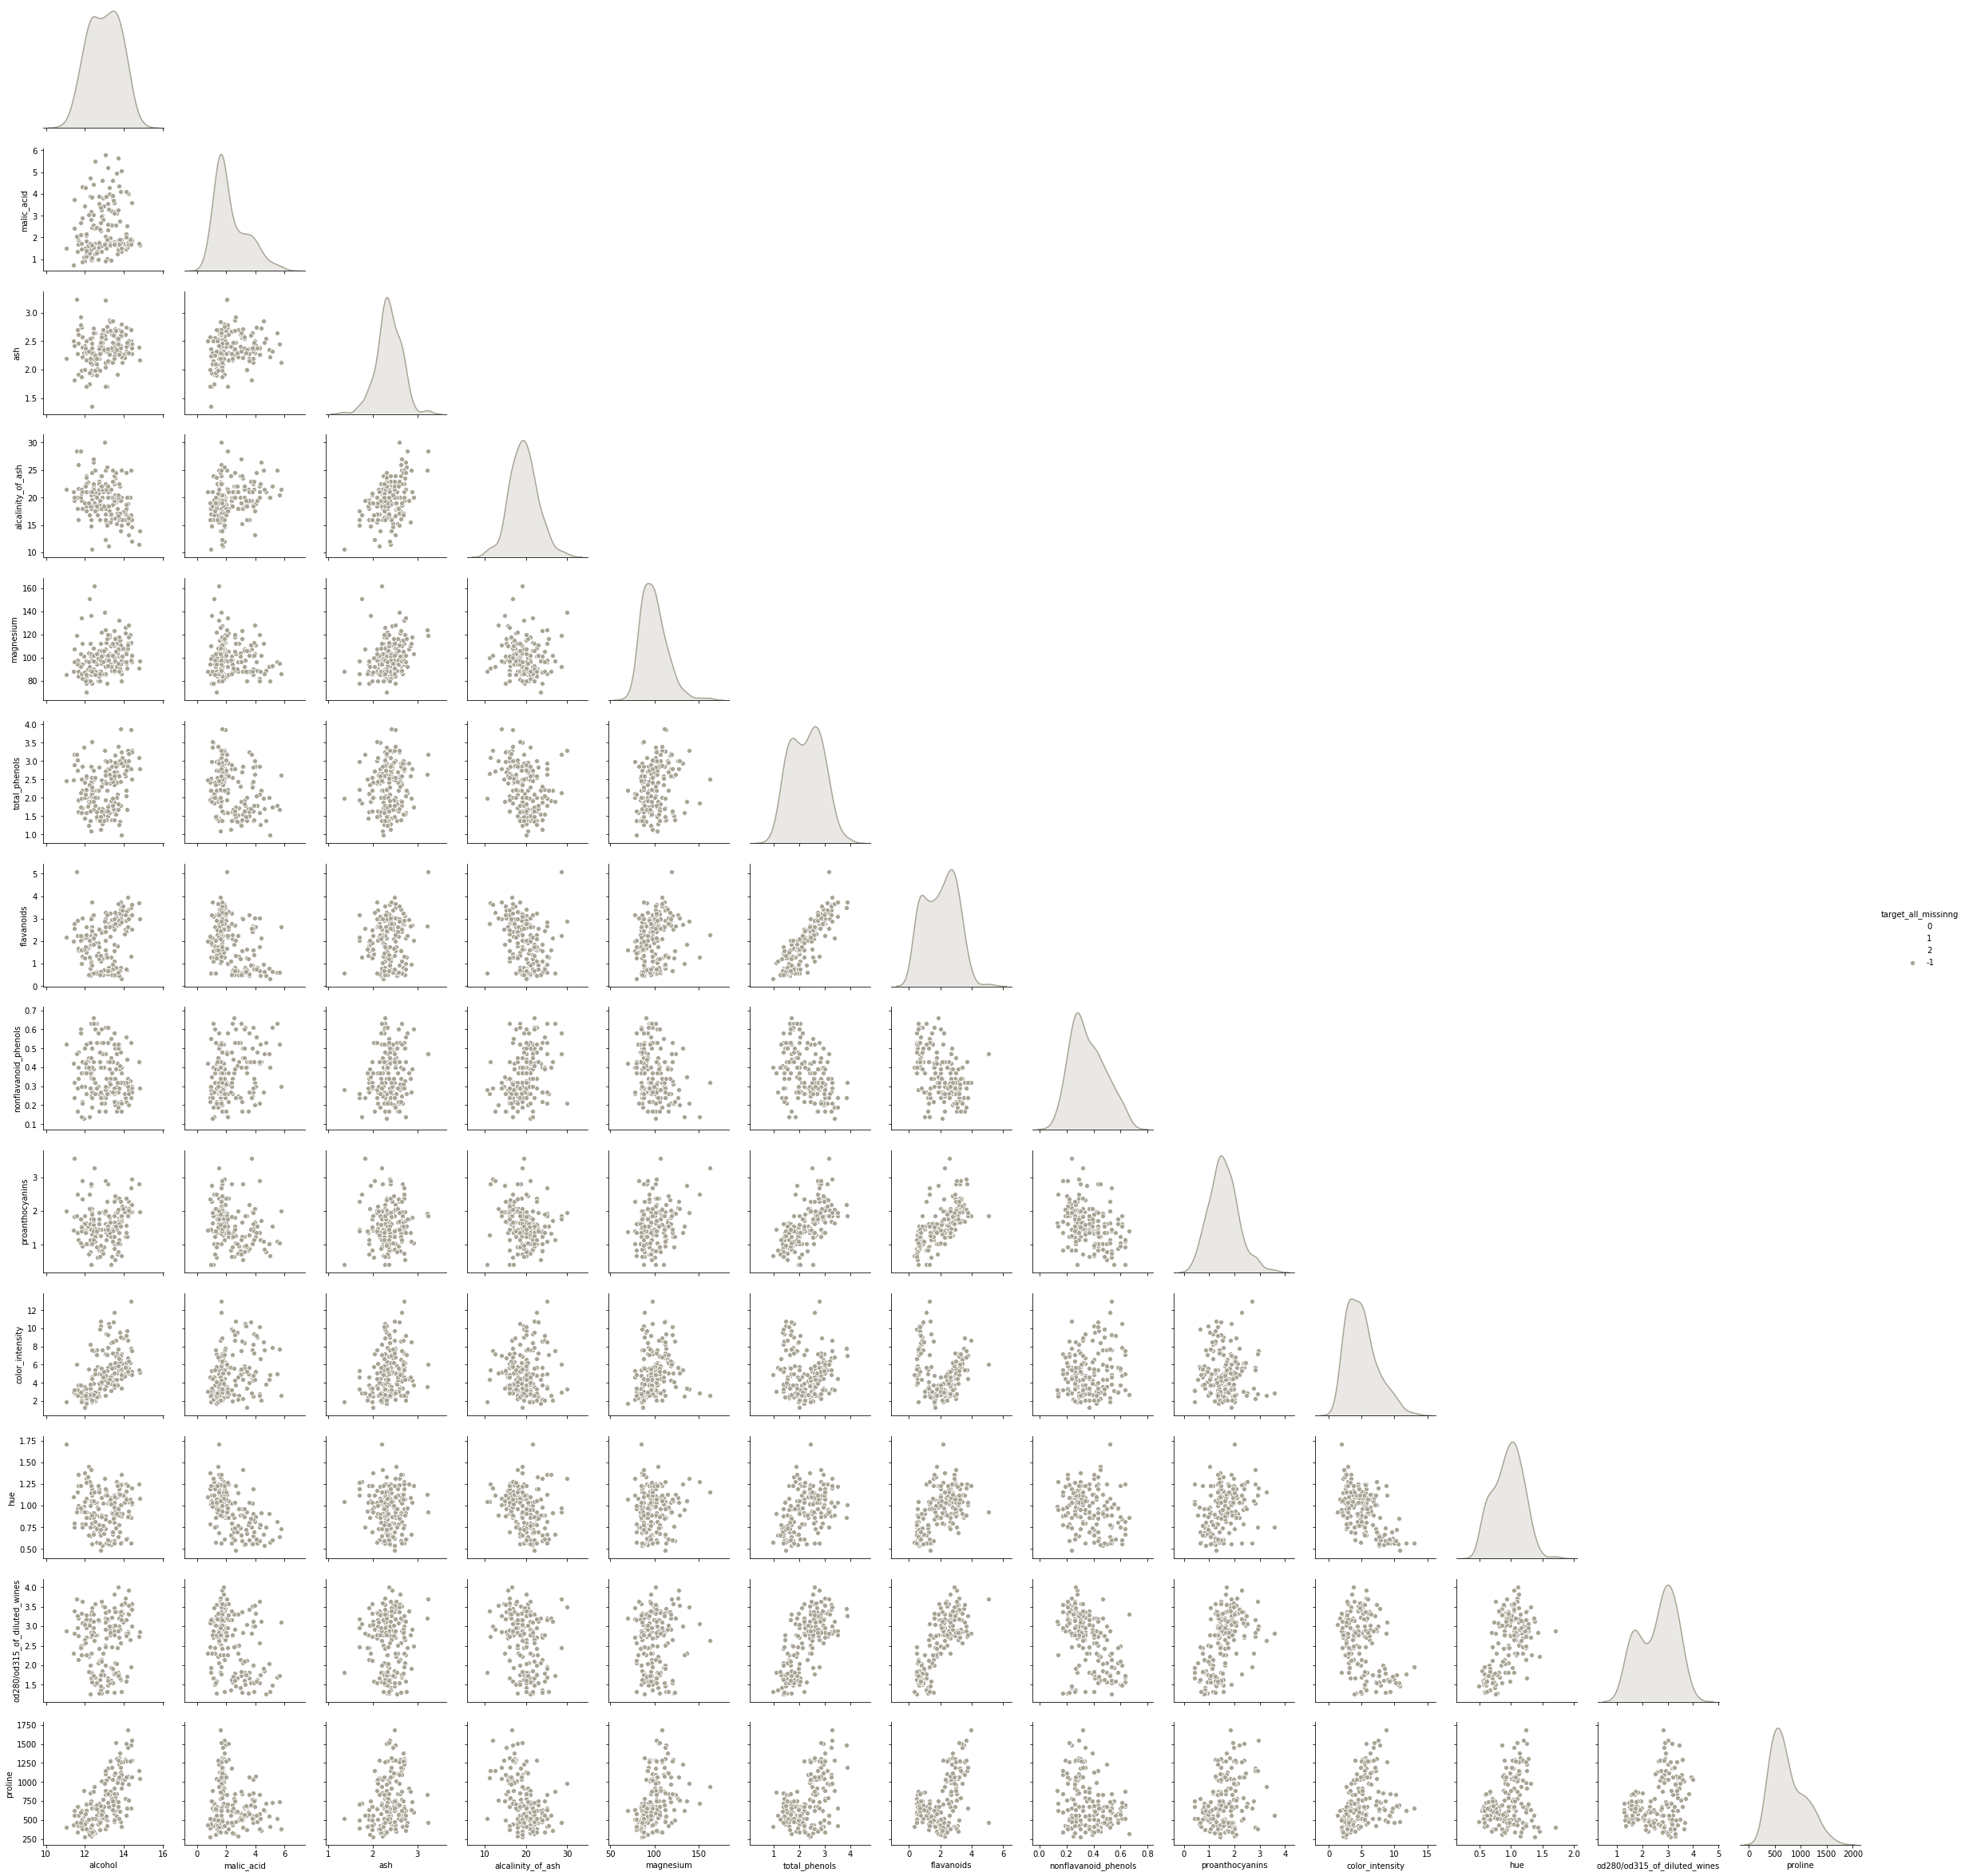

In [373]:
g = sns.pairplot(data=df_wine, vars=df_features.columns, hue='target_all_missinng', 
                 corner=True, palette=customer_palette, hue_order=target_order)

# What we learned from EDA
- You might be wondering why I visualize the same data three times just the colors are different. Am I LOCO? ;p
- So, here is the thing, I challenge you to sperate the data into three different groups, and I encourage you to test your ability to distiguish three different target class with color aid, with weak color aid and no color aid. 
- The point here is without target labels (unsupervised learning situation) or only limited amount of labels (semi-supervised learning situation), the classification task can be very hard. 
- Intuitively speaking, since the three classes are mixed with each other in most of the paired plots, linear model like logistic regression might not sperate them easily. Even certain non-linear model might have good performance in the training judged by the estimation metrics, it is very likely to be overfitting. 

Let's see what would happen if we perform PCA on the the original data? 

In [374]:
# Perform PCA on the data
X_train = df_wine.iloc[:,:-2].copy()
y_train = df_wine.iloc[:,-2].copy()        
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# X_train_pca
df_wine_pca_feature = pd.DataFrame(X_train_pca)
df_wine_pca = pd.concat([df_wine_pca_feature, df_target], axis=1)
df_wine_pca

0         1         2         3         4         5         6  \
0   -3.630260 -1.455859 -0.193224  0.376028  0.625825 -0.413364  0.536248   
1   -2.701443  0.328791 -2.017963 -0.640601 -0.138918 -0.754377 -0.129753   
2   -2.938537 -1.038510  0.969418  0.458778 -0.601570  0.454715  0.536148   
3   -4.005078 -2.771548 -0.209735  0.488929 -0.434215  0.442363 -0.404744   
4   -1.649269 -0.867133  2.043806 -0.399212  0.302656 -0.686974  0.408096   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.851497 -2.204385 -0.315465 -0.036253 -1.377970 -0.898960  0.652067   
174  3.222781 -1.751392  0.201393  0.452678 -0.054036 -0.048705  0.106012   
175  3.313601 -2.755340 -0.953203  1.040372  0.588152 -0.349472  0.761748   
176  3.058587 -2.293491 -0.570230  0.331869  1.208228  0.685931  0.888638   
177  2.620999 -2.750650  1.168038 -0.879849 -1.523670 -0.329221  0.306368   

            7         8         9        10        11        12        13  \
0    0.026775 -0.138287 -0.906094 -0.640108 -0.577392  0.615254 -0.161442   
1   -0.752308 -0.548964  0.347671 -0.267748 -0.202782  0.433582 -0.047644   
2   -0.033302  0.847205  0.882241 -0.193195 -0.334879  0.018322  0.051077   
3   -0.401973 -0.510966  0.026918 -0.528791  0.659836 -0.172801 -0.434200   
4   -0.357278 -0.273572 -0.270442  0.223550 -0.493129 -0.261791  0.175778   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.643288 -0.533435  0.372992 -0.115702  0.097881  0.220164 -0.081327   
174  0.632917  0.075351  0.235866 -0.070271  0.235172 -0.253233 -0.153553   
175 -0.020483 -0.087750  0.108198  0.090396  0.539893  0.674681  0.195707   
176 -0.527992  0.039919 -0.254613 -0.423002  0.226404  0.369125 -0.039402   
177 -0.719504  1.201522 -1.408341  1.802965  0.233597 -0.414007 -0.828523   

           14  target_original  target_small_missinng  target_large_missinng  \
0    0.165933                0                      0                     -1   
1    0.097427                0                      0                     -1   
2   -0.070854                0                      0                     -1   
3    0.017293                0                      0                     -1   
4   -0.500938                0                      0                     -1   
..        ...              ...                    ...                    ...   
173  0.039750                2                      2                     -1   
174 -0.041863                2                      2                     -1   
175 -0.061028                2                      2                     -1   
176  0.078422                2                      2                      2   
177  0.165140                2                     -1                     -1   

     target_all_missinng  
0                     -1  
1                     -1  
2                     -1  
3                     -1  
4                     -1  
..                   ...  
173                   -1  
174                   -1  
175                   -1  
176                   -1  
177                   -1  

[178 rows x 19 columns]

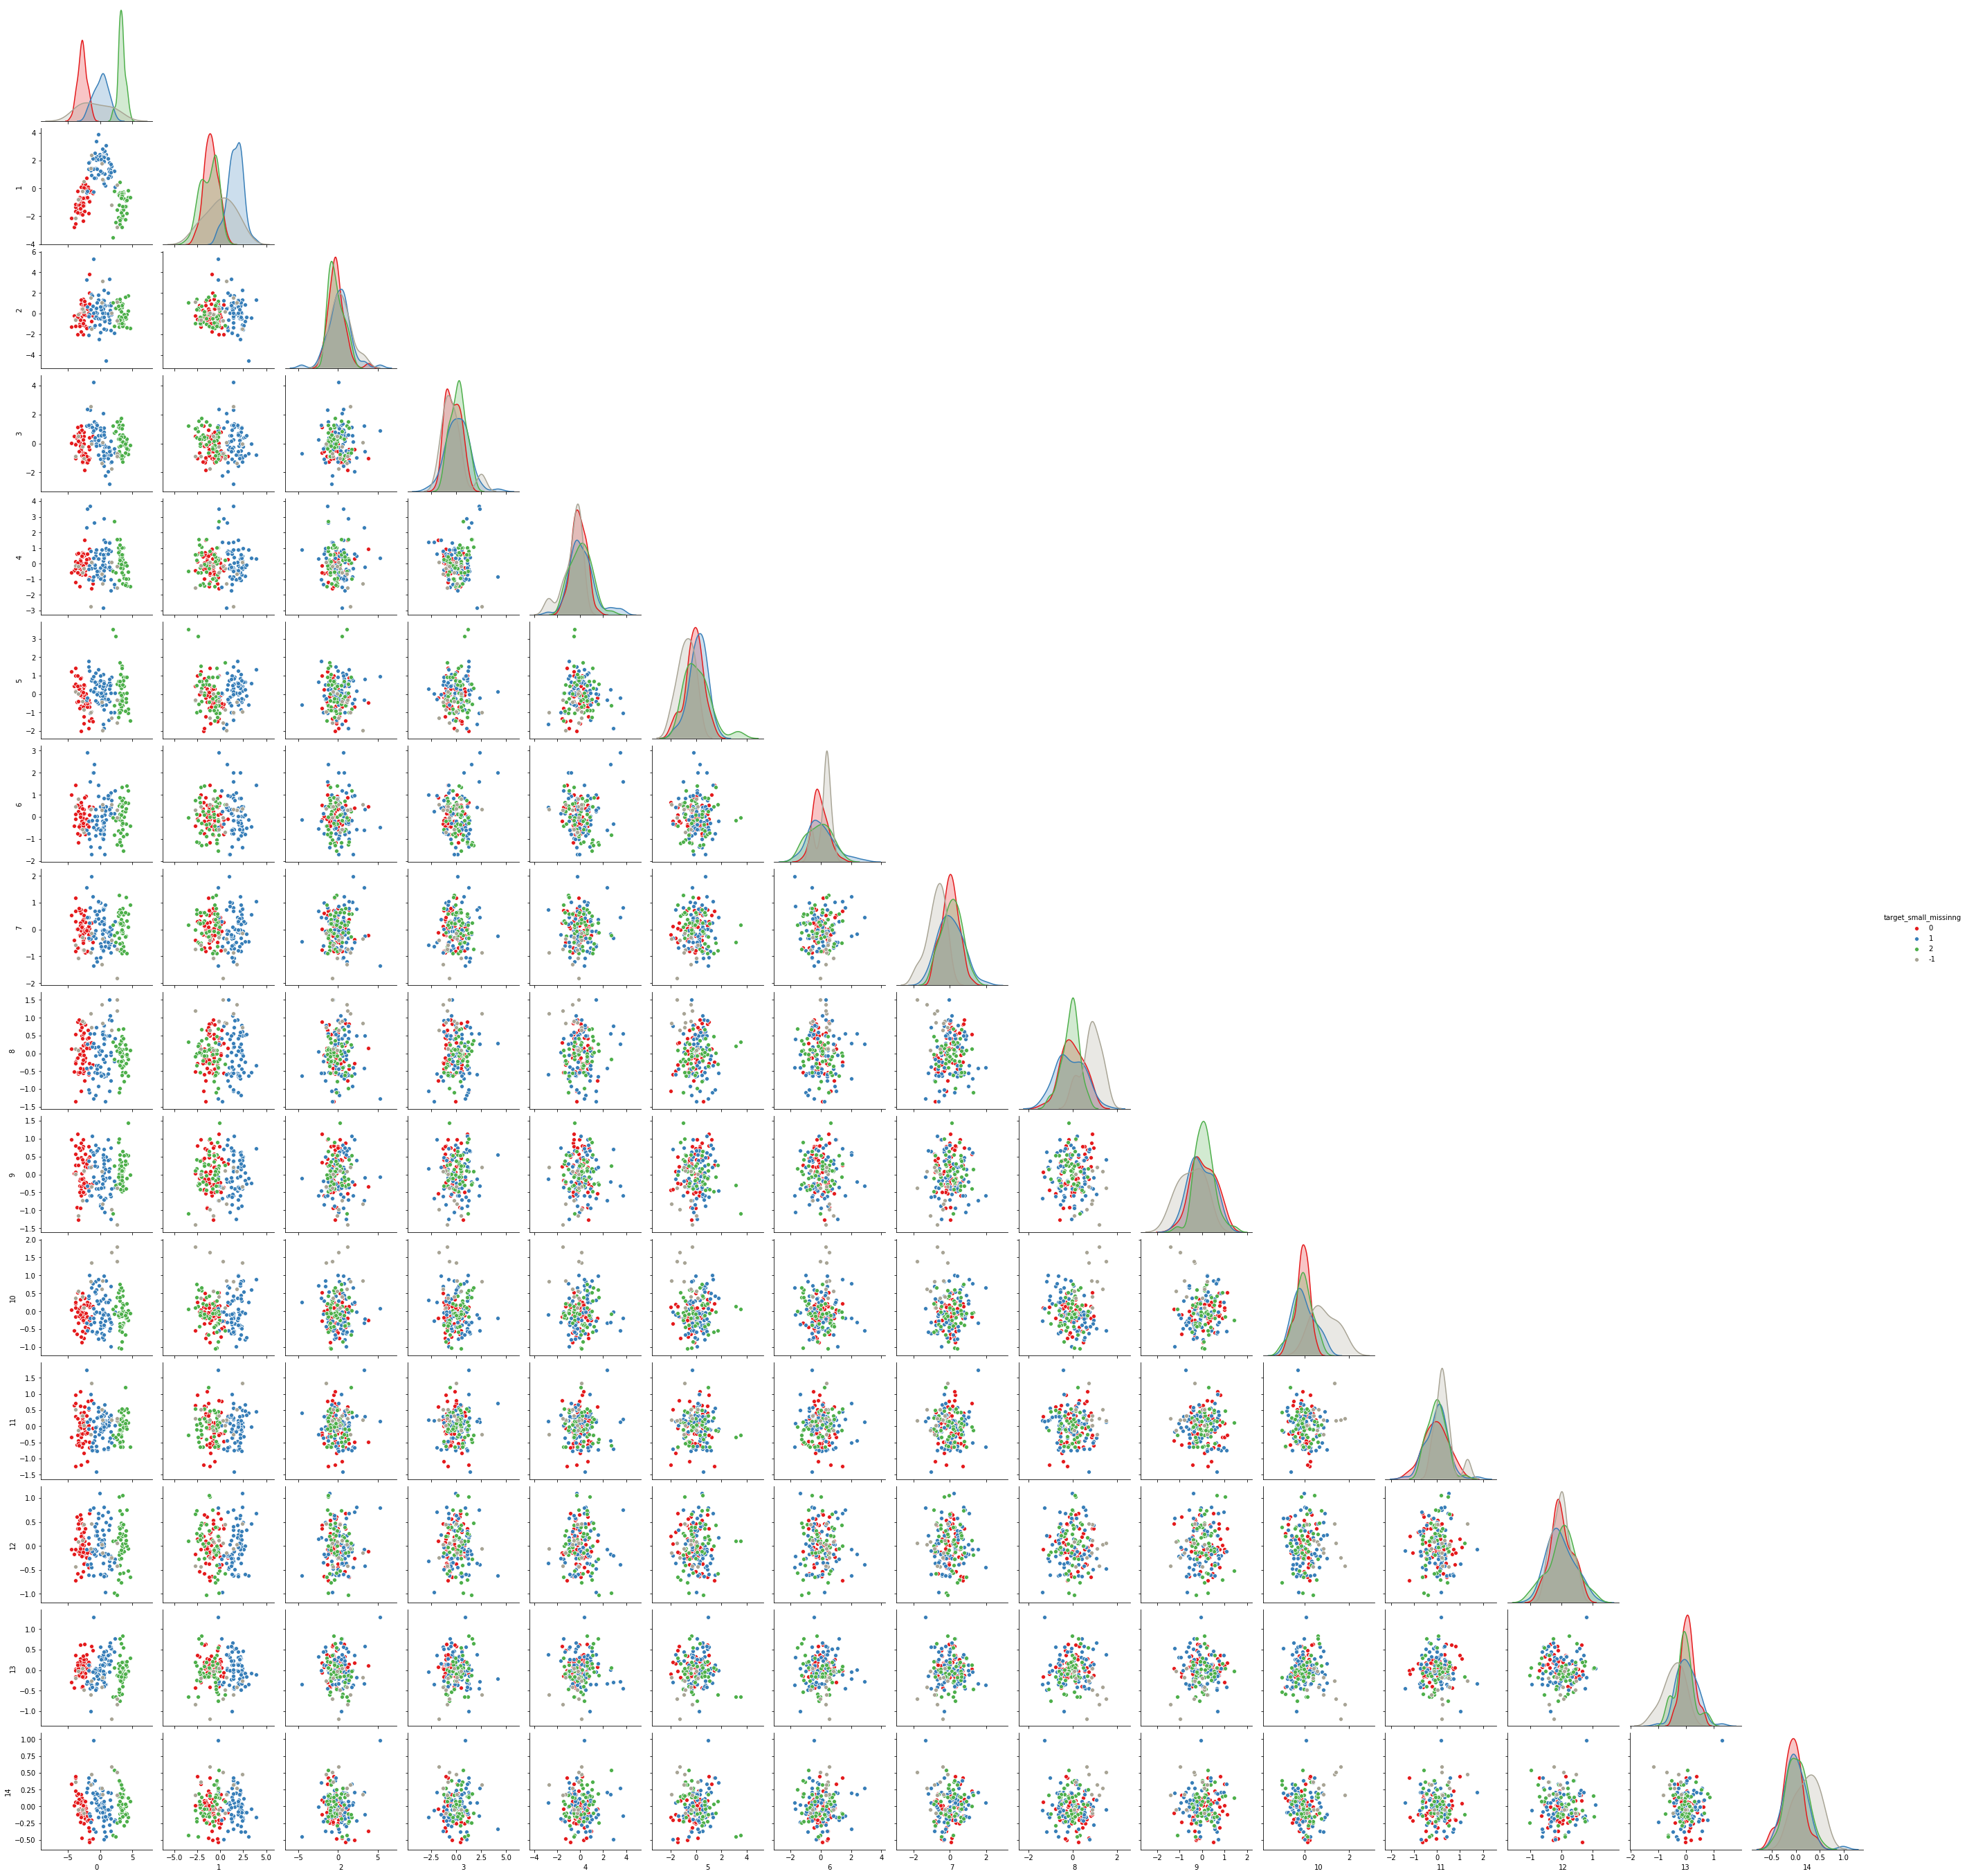

In [375]:
sns.pairplot(data=df_wine_pca, vars=df_wine_pca_feature.columns, hue='target_small_missinng', 
             corner=True, palette=customer_palette, hue_order=target_order)

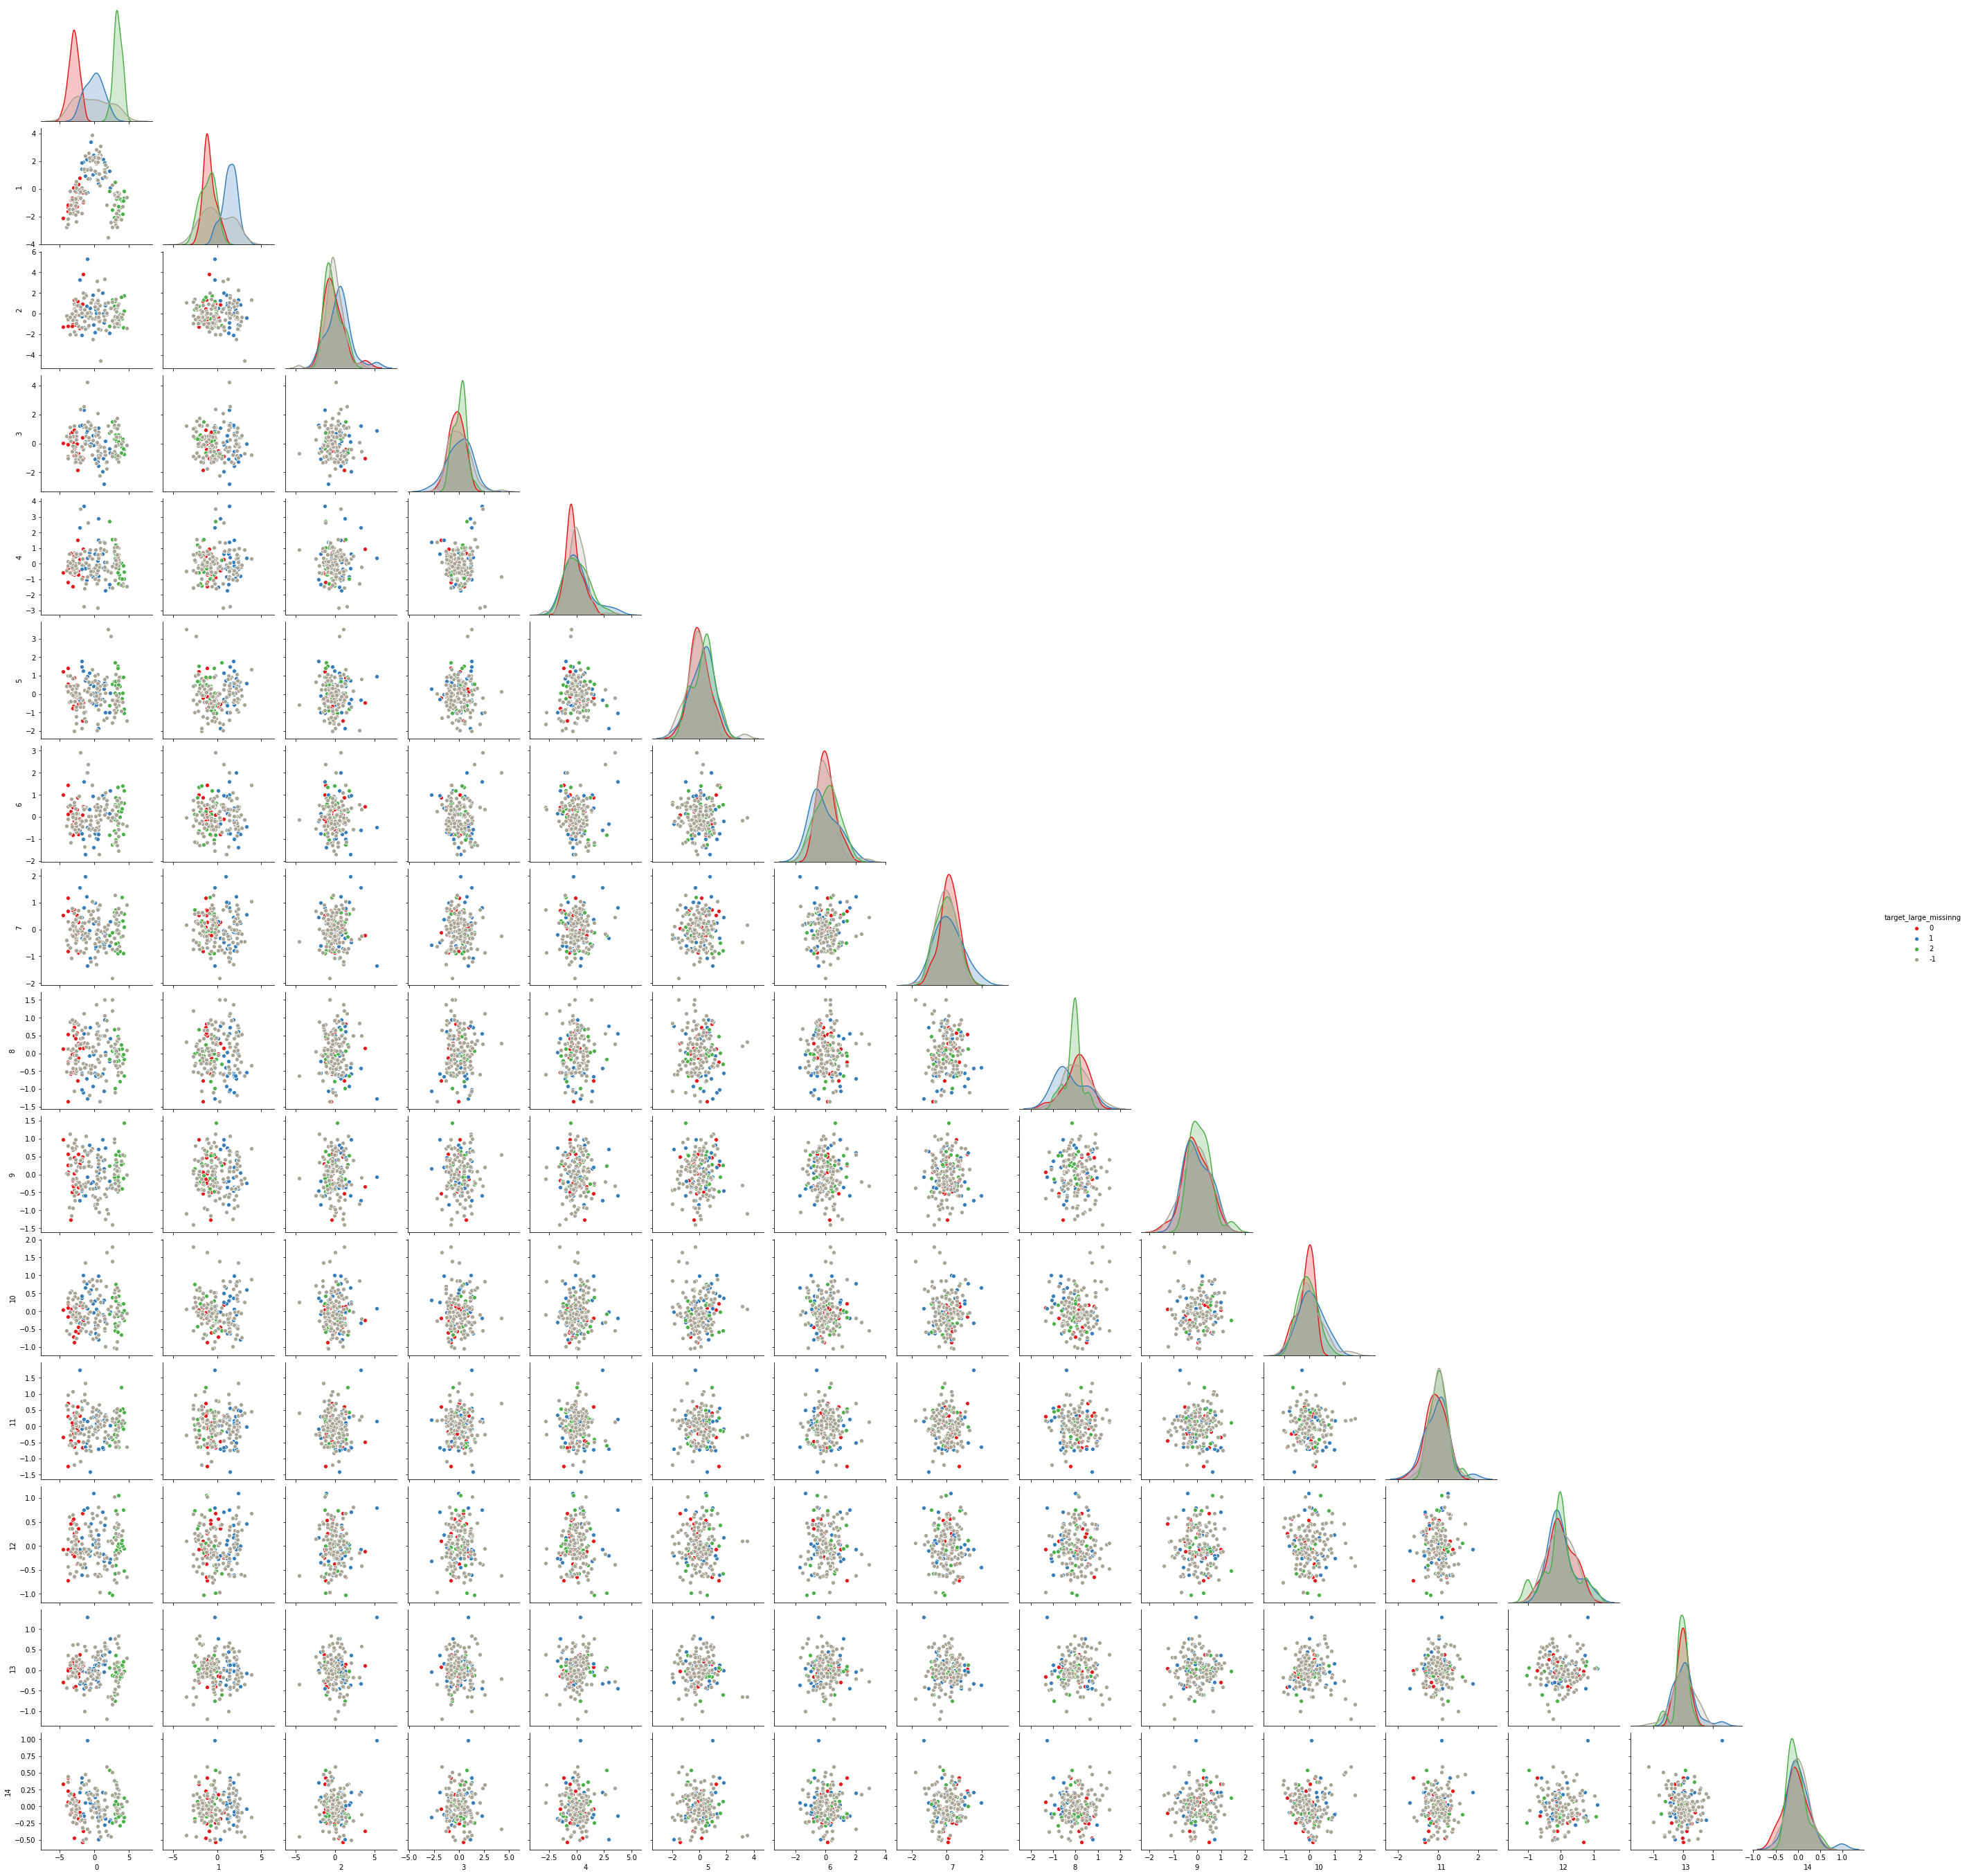

In [376]:
sns.pairplot(data=df_wine_pca, vars=df_wine_pca_feature.columns, hue='target_large_missinng', 
             corner=True, palette=customer_palette, hue_order=target_order)

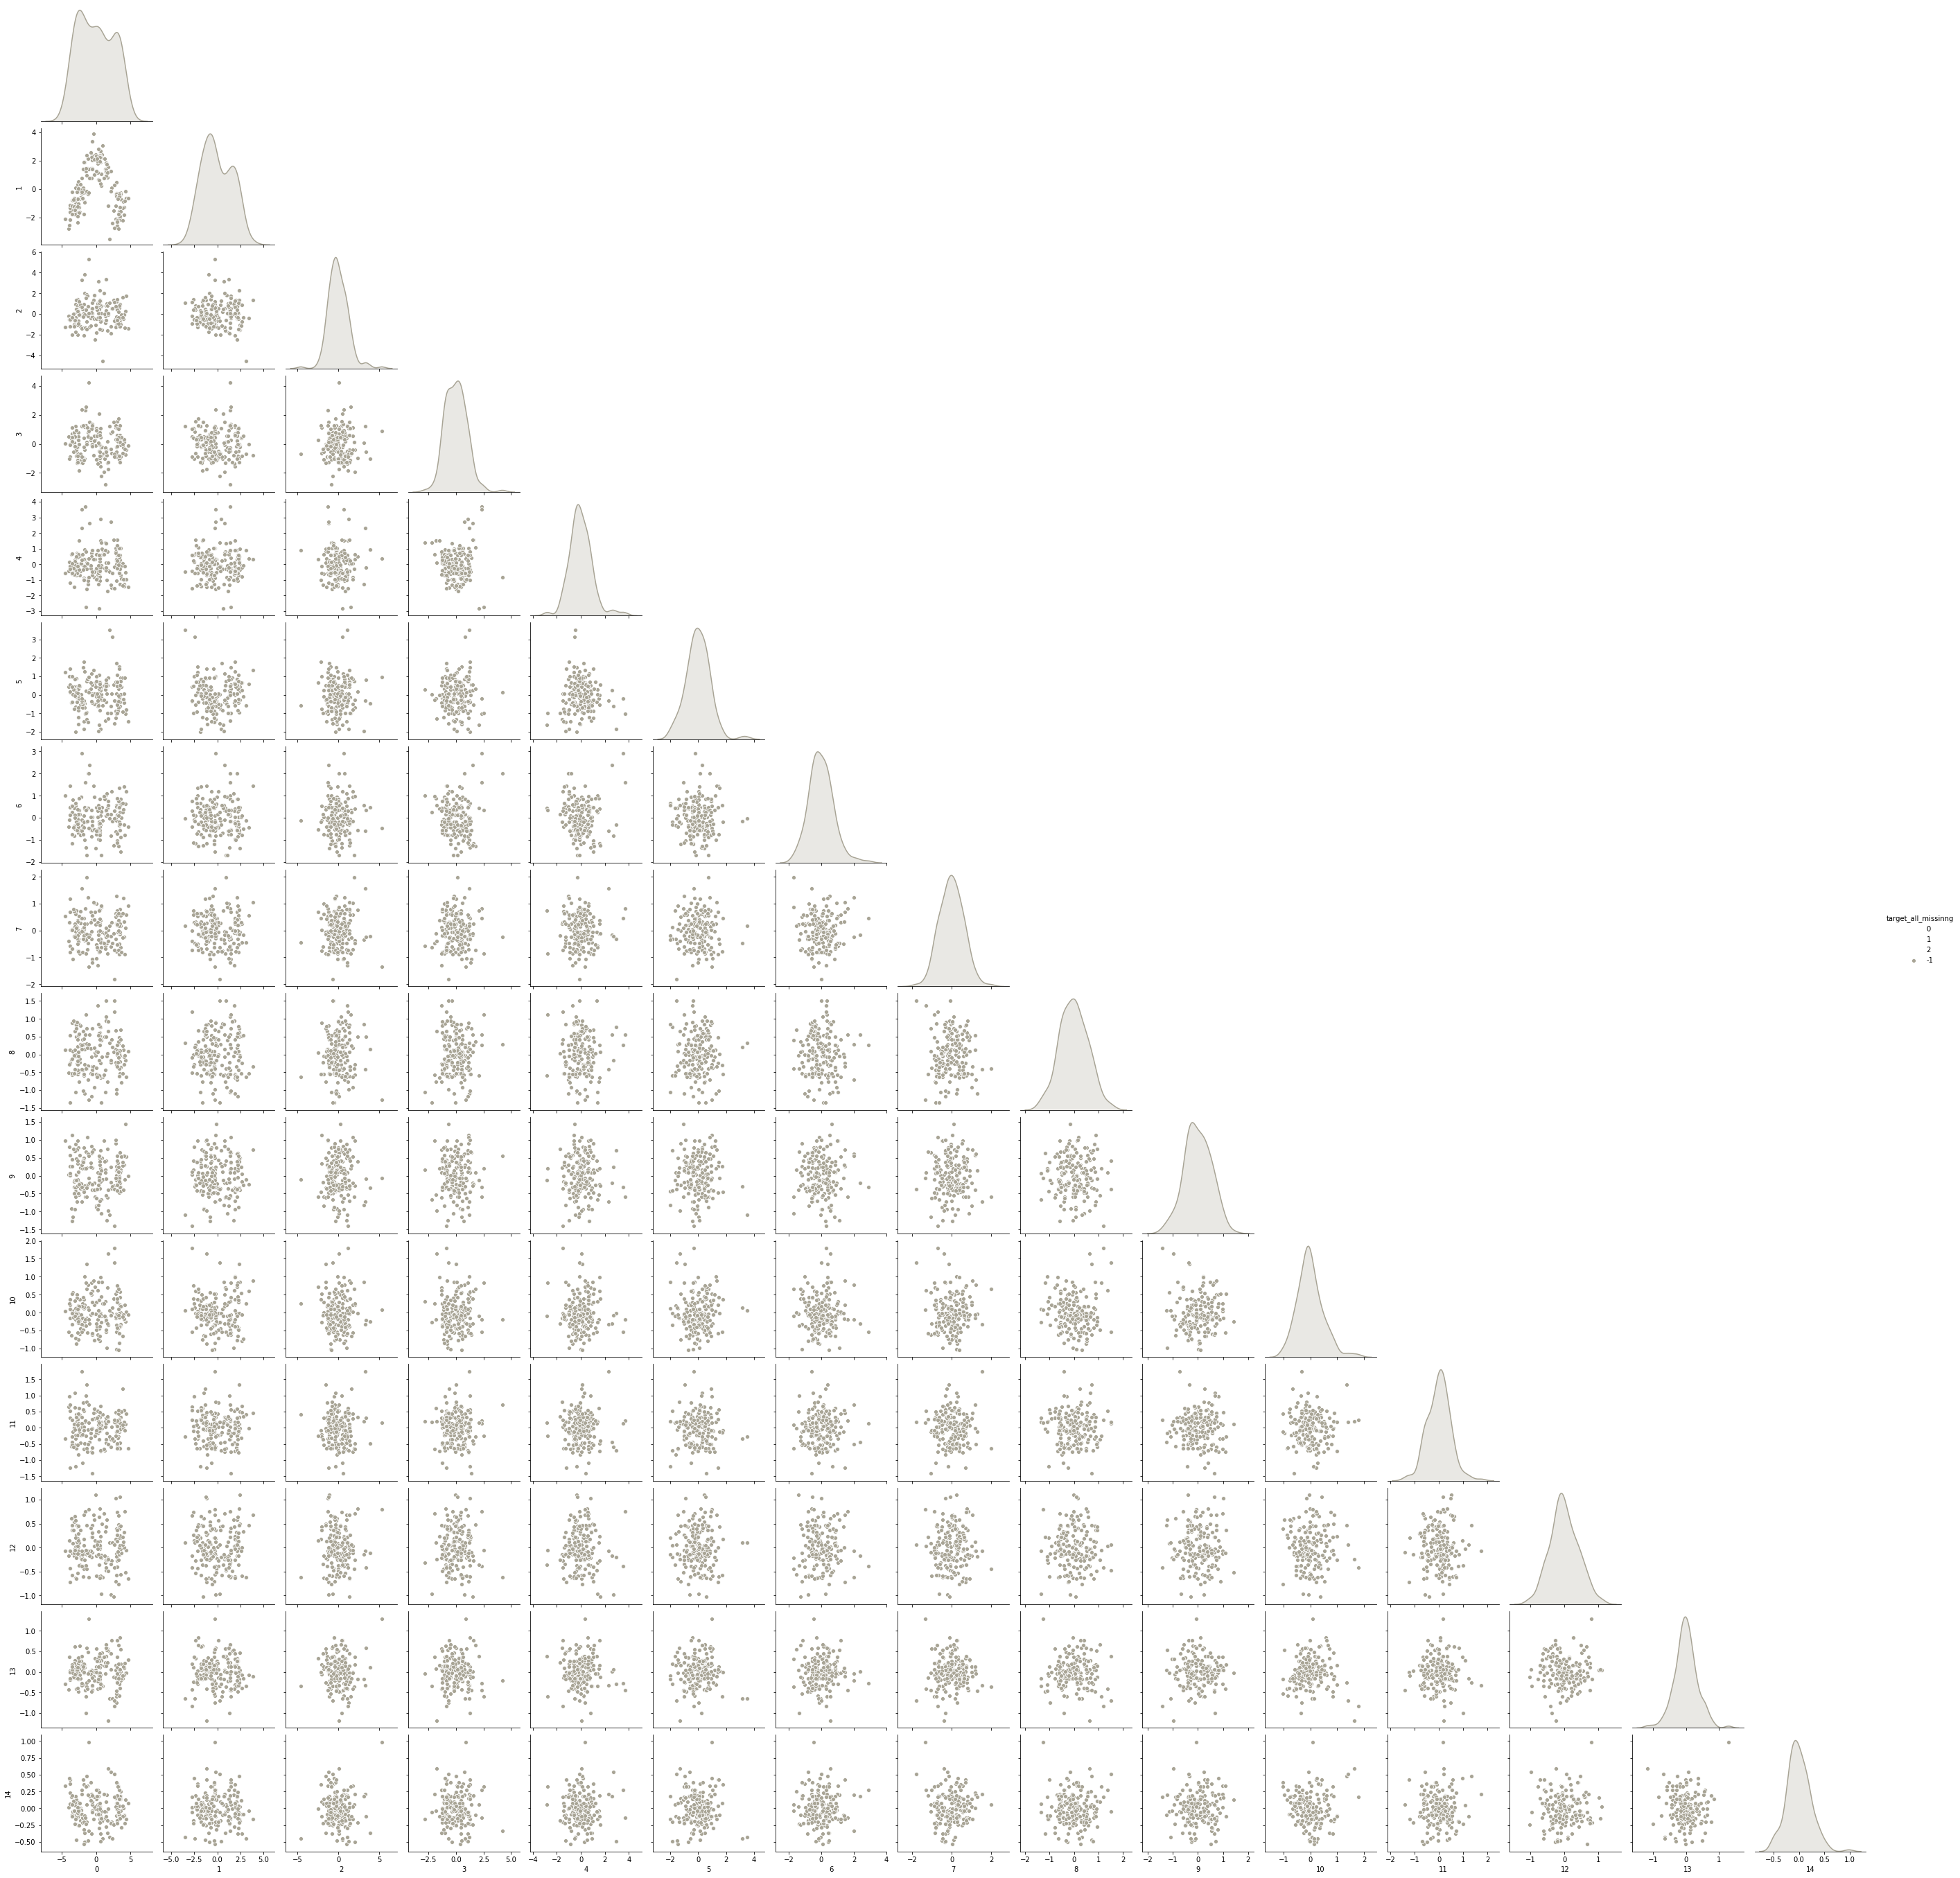

In [377]:
sns.pairplot(data=df_wine_pca, vars=df_wine_pca_feature.columns, hue='target_all_missinng', 
             corner=True, palette=customer_palette, hue_order=target_order)

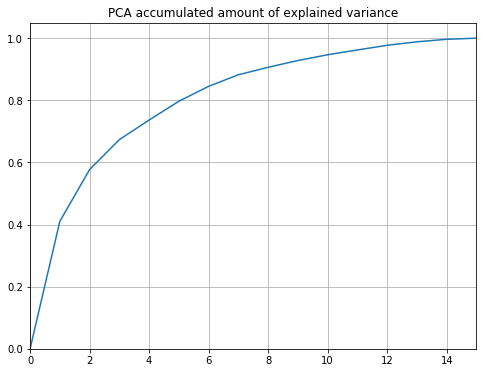

In [378]:
pca_var = pca.explained_variance_ratio_.cumsum()
pca_var = np.insert(arr=pca_var, obj=0, values=0)
plt.figure(figsize=(8,6))
plt.plot(range(len(pca_var)), pca_var)
plt.title('PCA accumulated amount of explained variance')
plt.grid()
plt.ylim([0,1.05])
plt.xlim([0,len(pca_var)-1])
plt.show()

# Some comments
- You might have this wonder why we use PCA for feature engineering? The reason is normally after performing PCA the locations associate with the three different classes are much more consistent especially if we look at the first column, which is the first principle component pair with the rest principle component. And this will allow us to make a wild but pretty good guess which class certain data belong to even given limited amout of the target labels. Notes*
- We might even be more agressive by just focusing on the top two principle components. These two principle components contribute a litte short of 60% of the explained variance.
- You might also realize that before performing PCA, I also conduct standardScaler, and that's the whole point of this post, we try to compare different transformers and have a benchmark and desicde which one is a better choice.

Notes*: the purpose of this post is to give you an intuition, we cluster the data just by visualizing it. But note that clustering can be done by using methods like K-means.

In [379]:
df_wine_pca

0         1         2         3         4         5         6  \
0   -3.630260 -1.455859 -0.193224  0.376028  0.625825 -0.413364  0.536248   
1   -2.701443  0.328791 -2.017963 -0.640601 -0.138918 -0.754377 -0.129753   
2   -2.938537 -1.038510  0.969418  0.458778 -0.601570  0.454715  0.536148   
3   -4.005078 -2.771548 -0.209735  0.488929 -0.434215  0.442363 -0.404744   
4   -1.649269 -0.867133  2.043806 -0.399212  0.302656 -0.686974  0.408096   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.851497 -2.204385 -0.315465 -0.036253 -1.377970 -0.898960  0.652067   
174  3.222781 -1.751392  0.201393  0.452678 -0.054036 -0.048705  0.106012   
175  3.313601 -2.755340 -0.953203  1.040372  0.588152 -0.349472  0.761748   
176  3.058587 -2.293491 -0.570230  0.331869  1.208228  0.685931  0.888638   
177  2.620999 -2.750650  1.168038 -0.879849 -1.523670 -0.329221  0.306368   

            7         8         9        10        11        12        13  \
0    0.026775 -0.138287 -0.906094 -0.640108 -0.577392  0.615254 -0.161442   
1   -0.752308 -0.548964  0.347671 -0.267748 -0.202782  0.433582 -0.047644   
2   -0.033302  0.847205  0.882241 -0.193195 -0.334879  0.018322  0.051077   
3   -0.401973 -0.510966  0.026918 -0.528791  0.659836 -0.172801 -0.434200   
4   -0.357278 -0.273572 -0.270442  0.223550 -0.493129 -0.261791  0.175778   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.643288 -0.533435  0.372992 -0.115702  0.097881  0.220164 -0.081327   
174  0.632917  0.075351  0.235866 -0.070271  0.235172 -0.253233 -0.153553   
175 -0.020483 -0.087750  0.108198  0.090396  0.539893  0.674681  0.195707   
176 -0.527992  0.039919 -0.254613 -0.423002  0.226404  0.369125 -0.039402   
177 -0.719504  1.201522 -1.408341  1.802965  0.233597 -0.414007 -0.828523   

           14  target_original  target_small_missinng  target_large_missinng  \
0    0.165933                0                      0                     -1   
1    0.097427                0                      0                     -1   
2   -0.070854                0                      0                     -1   
3    0.017293                0                      0                     -1   
4   -0.500938                0                      0                     -1   
..        ...              ...                    ...                    ...   
173  0.039750                2                      2                     -1   
174 -0.041863                2                      2                     -1   
175 -0.061028                2                      2                     -1   
176  0.078422                2                      2                      2   
177  0.165140                2                     -1                     -1   

     target_all_missinng  
0                     -1  
1                     -1  
2                     -1  
3                     -1  
4                     -1  
..                   ...  
173                   -1  
174                   -1  
175                   -1  
176                   -1  
177                   -1  

[178 rows x 19 columns]

C:\Users\kefei\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (178). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


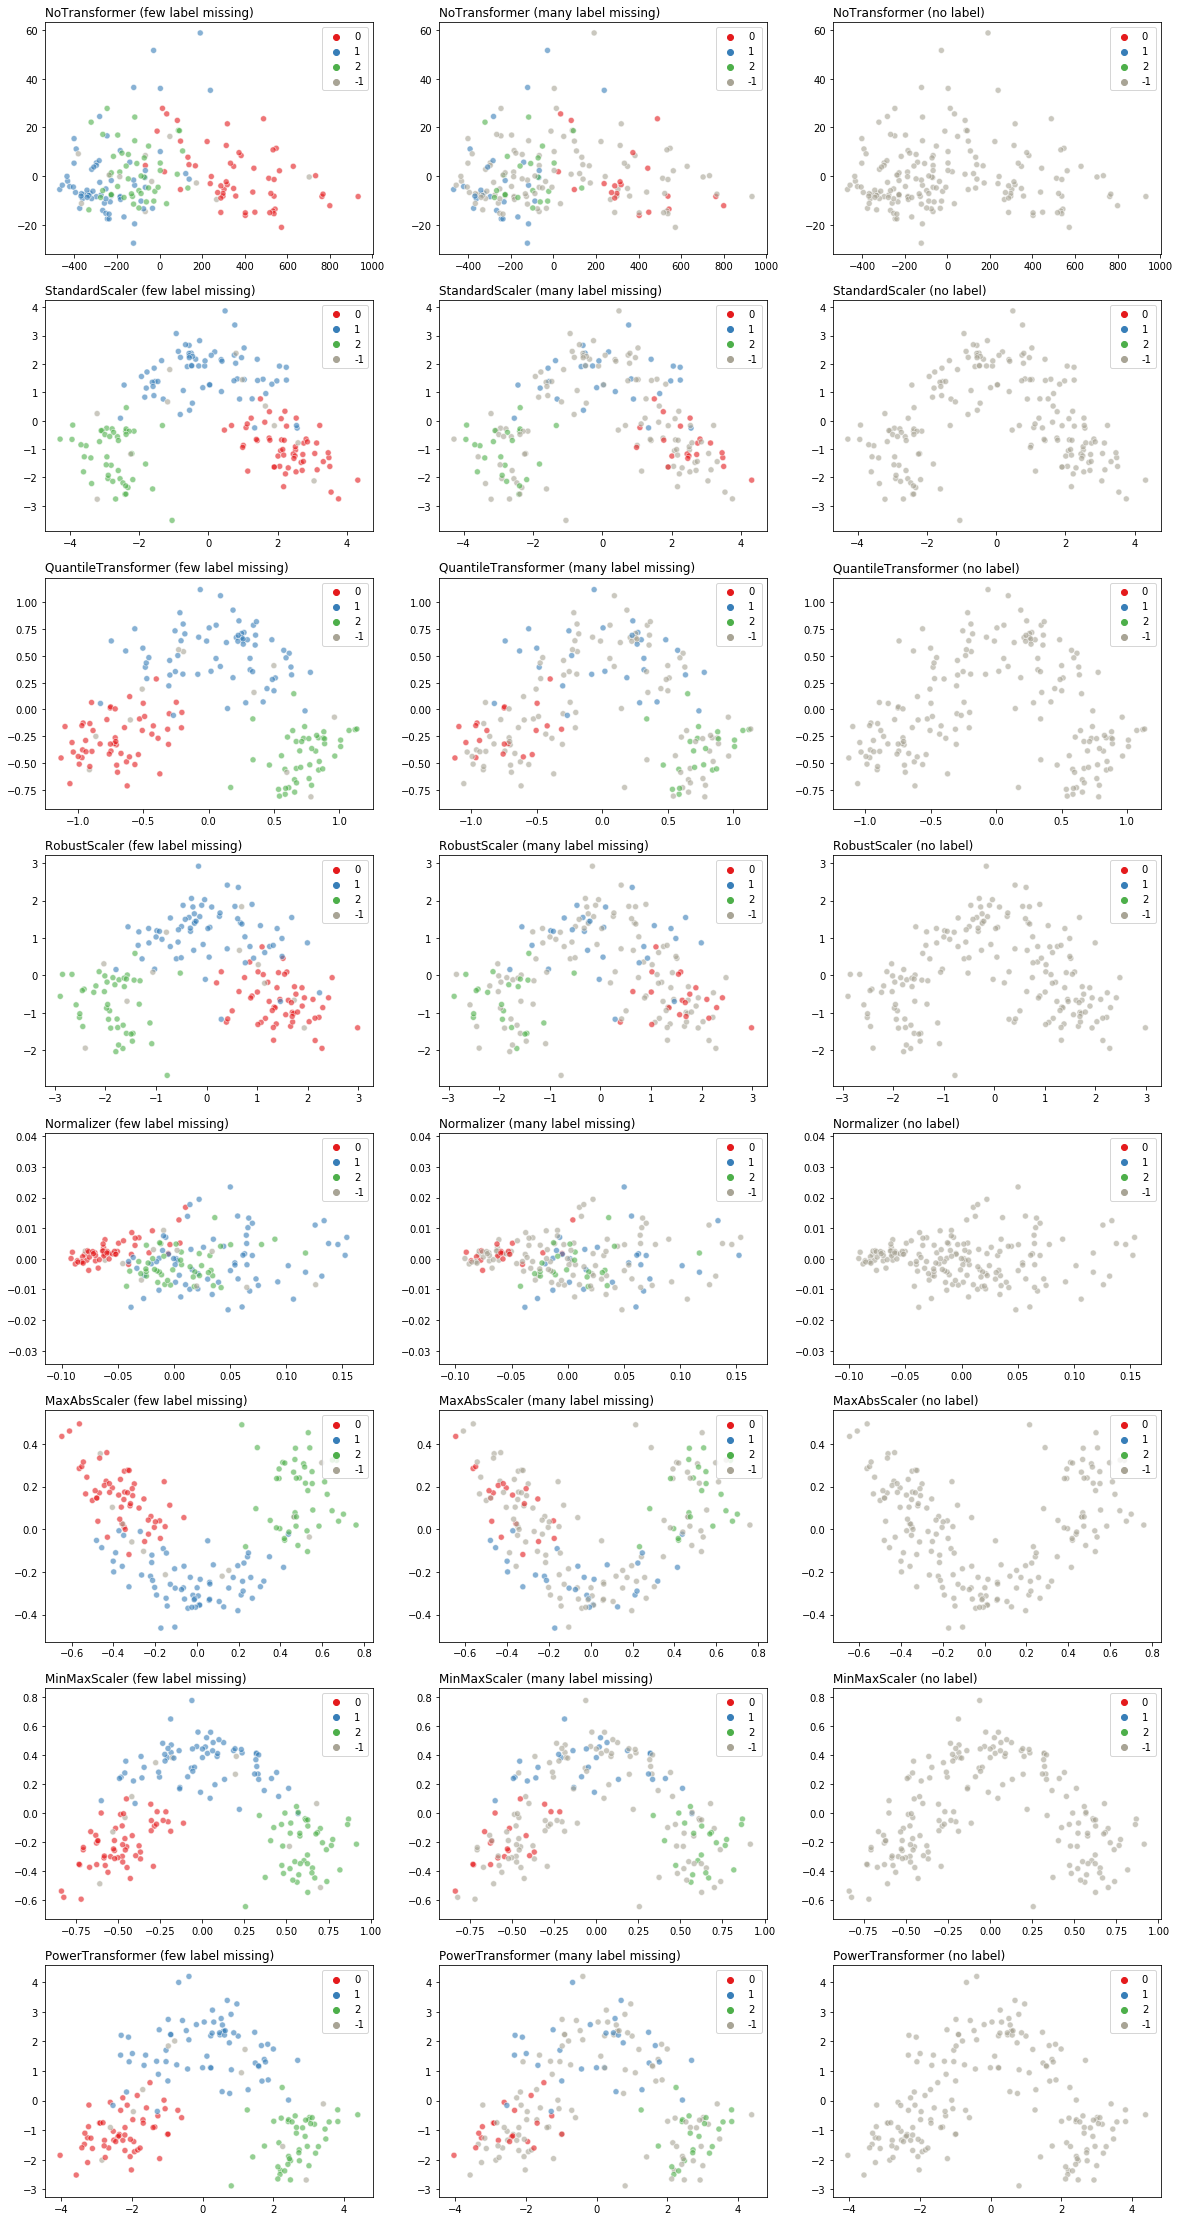

In [396]:
# X_train = df_wine.iloc[:,:-3].copy()
X_train = df_features.copy()
# y_train = df_target.iloc[:,1].copy()
y_train = df_target

index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)


# Some comments
- This is a thoroughly exam of all the transformer you can find in the skleanr.preprocessing module.
- As mentioned before now we are focousing on the result of the first two principles. According to the result most of the transformers have fair performances and out-performed the result without any scaling/transformation. The reason is mainly due to the fact that features vairance is related to their unit, and features with higher variance would be assigned higher weight and contribute more in the top principle components. 
- Among other transformers, normalizer is a wild card, since it work on row instead of columns/features. I don't have much comment on that, but just pay attention when using it and maybe let me know the reason for you choice.

# Things start to become messy.
The PCA performance is fairly well on the original dataset especially when we conducted some scaling. Note that the orinal dataset has normal-ish distribution, but what would happen if data has outliers? 

In [438]:
np.ones((len(df_outlier), 4) 

SyntaxError: unexpected EOF while parsing (<ipython-input-438-0f4ecf58c1b6>, line 1)

In [439]:
# add some outliers to test transformation module
import random
outlier_list = []
for i in range(len(df_features.columns)):
    np.random.seed(RANDOM_STATE)
    max_temp = df_wine.iloc[:,i].max() * (np.random.randint(5,20))
    std_tmp = df_wine.iloc[:,i].std() * (np.random.randint(1,10))
    outlier_list.append(np.random.normal(max_temp,std_tmp, 20))

np.swapaxes(np.array(outlier_list),0,1)
df_outlier = pd.DataFrame(np.swapaxes(np.array(outlier_list),0,1))
# random_target = [random.randrange(0, 3) for i in range(len(df_outlier))]
random_target = pd.DataFrame(np.ones((len(df_outlier), 4))*(-1))

df_outlier = pd.concat([df_outlier, pd.DataFrame(random_target)], axis=1)
df_outlier
df_outlier.columns = df_wine.columns

df_wine_new = pd.concat([df_wine, df_outlier], axis=0, ignore_index=True)
# df_wine_new.tail(5)

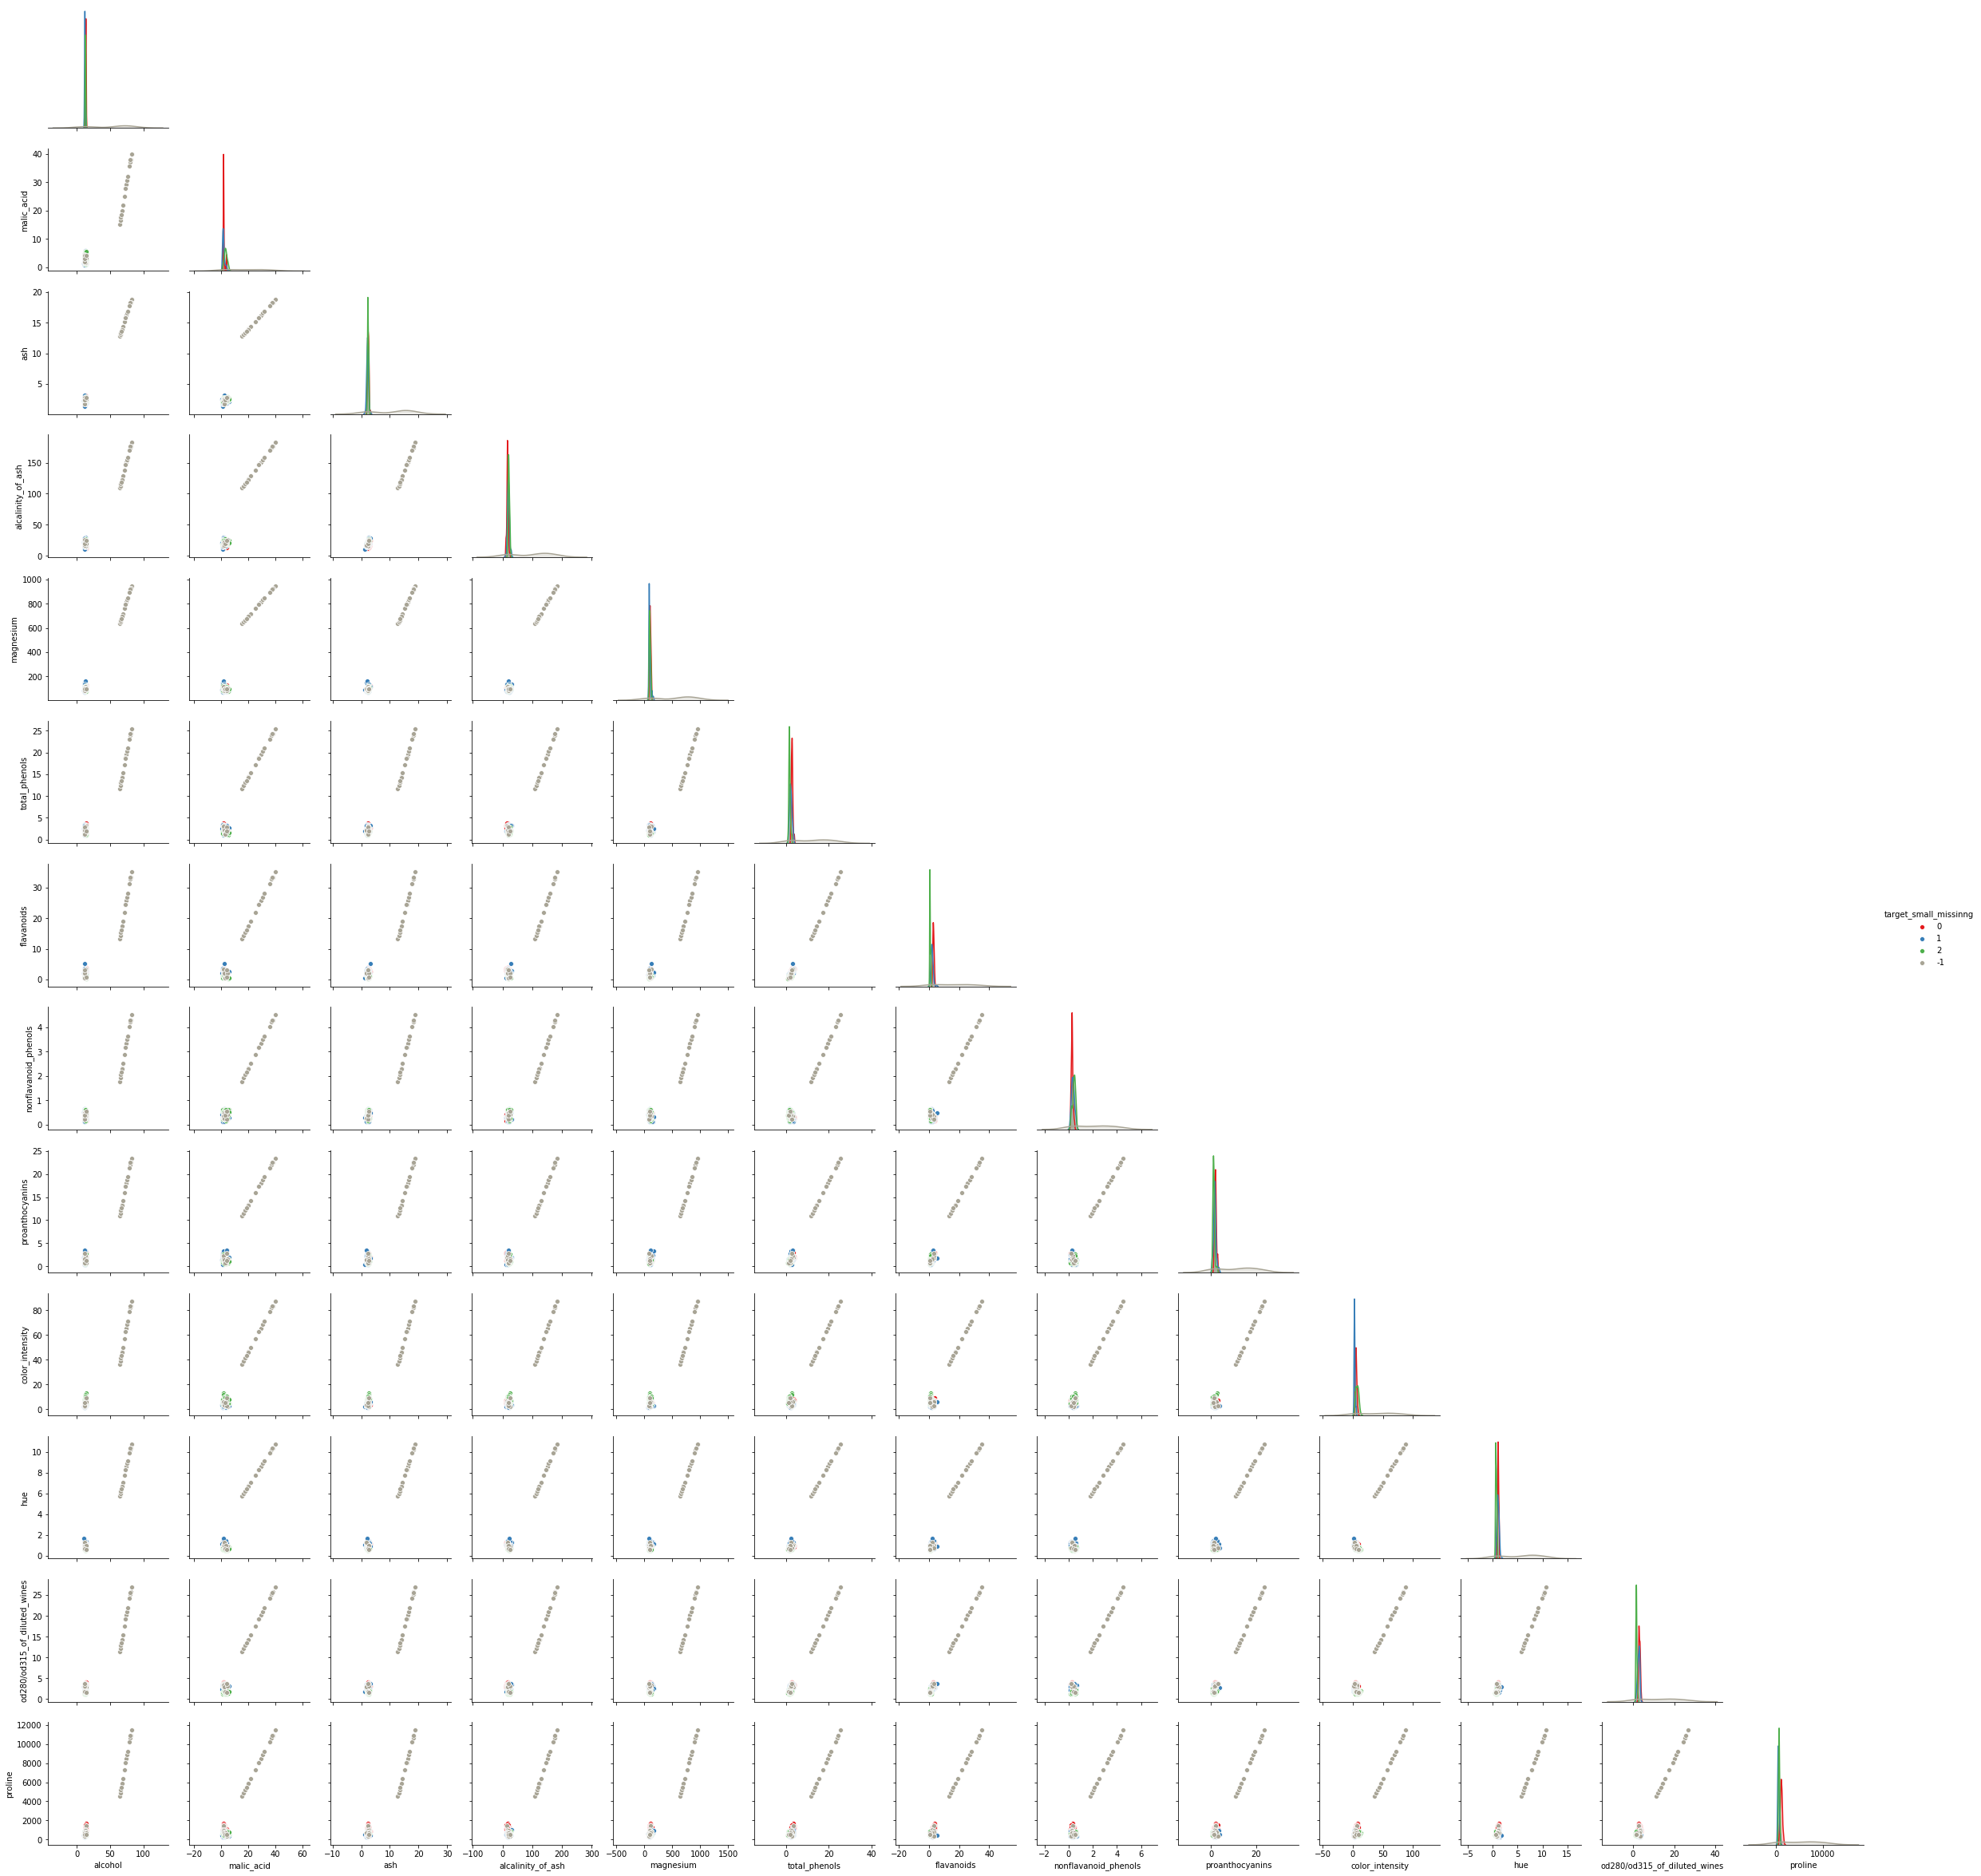

In [440]:
g = sns.pairplot(data=df_wine_new, vars=df_features.columns, hue='target_small_missinng',
                 corner=True, palette=customer_palette, hue_order=target_order)

In [ ]:
# compare the scatter plot of 1st and 2nd principle component, using different preprocessing tools
# the plot is focus on the orginal data after PCA, the PCA transformed outliers are not included.

C:\Users\kefei\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (198). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


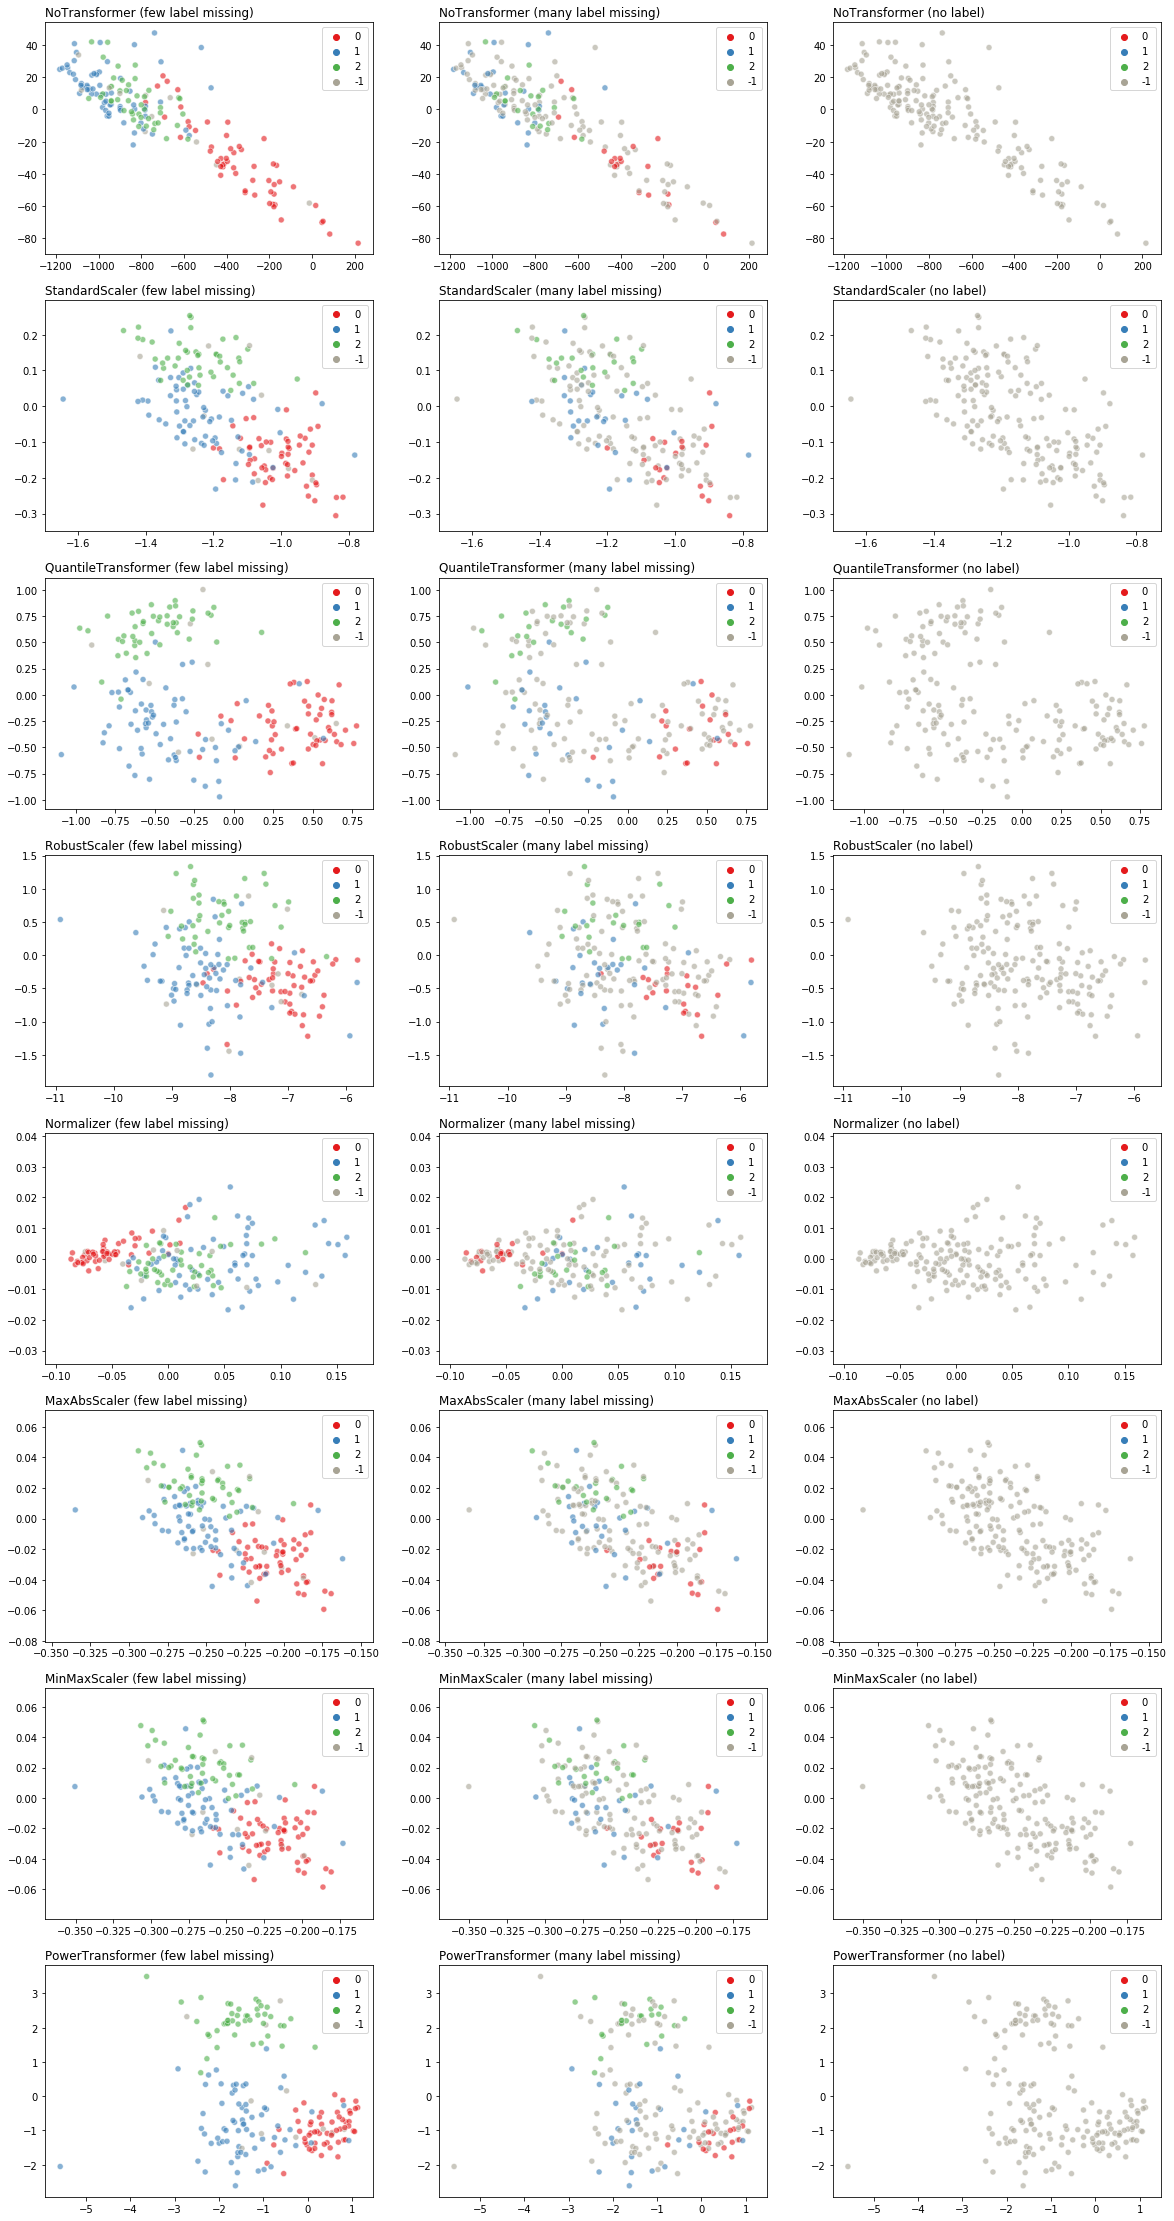

In [441]:
X_train = df_wine_new.iloc[:,:-4].copy()
# y_train = df_wine_new.iloc[:,-1].copy()
y_train = df_wine_new.iloc[:,-4:].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

# Some comments
When outliers are induced into the dataset, the performance of different transformers are very different. The two transformers that pass this test are non-linear transformers, namely QuantileTransformer and PowerTranformer.
For this reason, we should not only rely on standardScaler but might check transformer like powerTransformer and quantileTransformer.

# Summary of Part I

In [ ]:
# our story didn't end here

# part II...

In [ ]:
# test capability to handel one-hot encoding data

In [ ]:
# add a 'useful' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['_0', '_1', '_2']
X_train = pd.concat([X_train, y_train_dummy], axis=1)

y_train = df_wine.iloc[:,-1].copy()
index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add a 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              '_1':np.random.binomial(1, 0.5, size=len(X_train)),
#                               '_2':np.random.binomial(1, 0.9, size=len(X_train)),
#                               '_x':np.random.binomial(1, 0.7, size=len(X_train))
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, X_train_trash], axis=1, ignore_index=True)



index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add a 'trash' feature + outliers
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              '_1':np.random.binomial(1, 0.5, size=len(X_train)),
#                               '_2':np.random.binomial(1, 0.9, size=len(X_train)),
#                               '_x':np.random.binomial(1, 0.7, size=len(X_train))
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, X_train_trash], axis=1, ignore_index=True)



index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add both 'useful' and  flodded 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# add both 'useful' and  flodded 'trash' feature + outliers
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


index_list = X_train.index.isin(range(len(df_features)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# take a look at the new distribution

In [ ]:
X_train = df_wine_new.iloc[:,:-1].copy()
y_train = df_wine_new.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)

# X_train

# df_tmp

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(X_train.columns[:-1]), figsize=(20,10))
for index, col in enumerate(X_train.columns[:-1]):
    sns.boxplot(y=X_train[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=X_train[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=X_train, y=X_train[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
pt = PowerTransformer()
df_trans = pt.fit_transform(X_train)

df_trans = pd.DataFrame(df_trans)
df_trans = pd.concat([df_trans, df_wine_new.target], axis=1)



In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(df_trans.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_trans.columns[:-1]):
    sns.boxplot(y=df_trans[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_trans[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=df_tmp, y=df_tmp[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
pca = PCA()
df_tmp = pca.fit_transform(df_trans.iloc[:,:-1])
df_tmp = pd.DataFrame(df_tmp)
df_tmp = pd.concat([df_tmp, df_wine_new.target], axis=1)

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,len(df_tmp.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_tmp.columns[:-1]):
    sns.boxplot(y=df_tmp[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_tmp[col], ax=ax[1, index], color=palette[index])
#     sns.boxplot(data=df_tmp, y=df_tmp[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
#     ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
plt.hist(X_train.iloc[:,17], alpha=0.7)
plt.hist(df_trans.iloc[:,17], alpha=0.7)
plt.hist(df_tmp.iloc[:,17], alpha=0.7)
plt.legend(['X_train', 'df_trans', 'df_tmp' ])

In [ ]:
# what if we combine/ensemble QuantileTransform on continous data and PowerTransform on binarial, after that perform StandardScaler

In [ ]:
# add both 'useful' and  flodded 'trash' feature
X_train = df_wine.iloc[:,:-1].copy()
y_train = df_wine.iloc[:,-1].copy()

y_train_dummy = pd.get_dummies(y_train)
y_train_dummy.columns = ['y_0', 'y_1', 'y_2']
np.random.seed(RANDOM_STATE)
X_train_trash = pd.DataFrame({'x_0':np.random.binomial(1, 0.1, size=len(X_train)),
                              'x_1':np.random.binomial(1, 0.2, size=len(X_train)),
                              'x_2':np.random.binomial(1, 0.3, size=len(X_train)),
                              'x_3':np.random.binomial(1, 0.4, size=len(X_train)),
                              'x_4':np.random.binomial(1, 0.5, size=len(X_train)),
                              'x_5':np.random.binomial(1, 0.6, size=len(X_train)),
                              'x_6':np.random.binomial(1, 0.7, size=len(X_train)),
                              'x_7':np.random.binomial(1, 0.8, size=len(X_train)),
                              'x_8':np.random.binomial(1, 0.9, size=len(X_train)),                             
                             })
X_train_trash.index = X_train.index
# X_train = pd.concat([X_train, y_train_dummy, X_train_trash], axis=1)


df_ensemble = pd.concat([pd.DataFrame(QuantileTransformer().fit_transform(X_train)), 
#                          pd.DataFrame(PowerTransformer().fit_transform(y_train_dummy)),
                         pd.DataFrame(QuantileTransformer().fit_transform(X_train_trash))
                        ], axis=1, ignore_index=True)
    
df_ensemble = StandardScaler().fit_transform(df_ensemble)

pca = PCA()
X_train_pca = pca.fit_transform(df_ensemble)
# X_train_pca = 
fig, ax = plt.subplots(1, 2, figsize=(10, 40/8))
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
                     hue=y_train[index_list], style=y_train[index_list],
                    ax = ax[0]
               )
sns.scatterplot(x=X_train_pca[index_list,0], y=X_train_pca[index_list,1], 
#                      hue=y_train[index_list], 
                style=y_train[index_list],
                    ax = ax[1]
               )
plt.legend(loc='upper right')
# ax[i].set_title(transformer_list[i])

In [ ]:
# it is very similar to the result from standalone PowerTransform 

In [ ]:
# bonus, housing data

In [ ]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

In [ ]:
# sample_size = len(X_full)//1
# X_full = X_full[:sample_size]
# y_full = y_full[:sample_size]

In [ ]:
# create labels, transfer to classification problem
df_X = pd.DataFrame(X_full)
df_X.columns = dataset.feature_names

df_y = pd.DataFrame(y_full)
df_y.columns = ['price']

print(df_y.sort_values(by='price').iloc[len(df_y)//3])
print(df_y.sort_values(by='price').iloc[len(df_y)//3*2])

df_y['target'] = df_y.price.apply(lambda x: 0 if x<1.414 else (1 if  x<2.304 else 2))
# df_y

df_housing = pd.concat([df_X, df_y.target], axis=1)
df_housing.info()

In [ ]:
sns.distplot(df_y[df_y.target==2].price, label="high")
sns.distplot(df_y[df_y.target==1].price, label="median")
sns.distplot(df_y[df_y.target==0].price, label="low")
plt.legend()


In [ ]:
sns.pairplot(data=df_housing, vars=df_housing.columns[:-1], hue='target')

In [ ]:
palette = sns.color_palette("Blues") * 10
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(3,len(df_housing.columns[:-1]), figsize=(20,10))
for index, col in enumerate(df_housing.columns[:-1]):
    sns.boxplot(y=df_housing[col], ax=ax[0, index], color=palette[index])
    sns.violinplot(y=df_housing[col], ax=ax[1, index], color=palette[index])
#     sns.swarmplot(y=df_housing[col], ax=ax[1, index], color='orange', alpha=0.3)
    sns.boxplot(data=df_housing, y=df_housing[col], x='target', ax=ax[2, index])
    ax[0,index].set(xlabel=None, ylabel=None)
    ax[1,index].set(xlabel=None, ylabel=None)
    ax[2,index].set(xlabel=None, ylabel=None)

In [ ]:
X_train = df_housing.iloc[:,:-1].copy()
y_train = df_housing.iloc[:,-1].copy()


index_list = X_train.index.isin(range(len(df_y)))

X_train_trans_list, X_train_pca_list = transformer_bundle(X_train)
pca_scatter_plot(X_train_pca_list, y_train, index_list)

In [ ]:
# bonus 2, look inside power transfomer, whether it is robust to transforming binomial data (after one-hot-encoding),
# considering distribution and data size.

In [ ]:
test_size = 200
# X_train = df_wine.iloc[:,:-1].copy()

fig, ax = plt.subplots(1,9, figsize=(20,5))
# for index in range(9):
for index,p in enumerate(np.linspace(0.1, 0.9, num=9)):
#     print (index)
#     print (p)
#     p = index / 10
    np.random.seed(seed=RANDOM_STATE)
    data_binomial = np.random.binomial(1, p=p, size=test_size)
    # data_binomial
    sns.scatterplot(range(len(data_binomial)), data_binomial, ax=ax[index,])
    pt = PowerTransformer()
    data_trans = pt.fit_transform(data_binomial.reshape(-1, 1))
    sns.scatterplot(range(len(data_trans)), data_trans.ravel(), ax=ax[index,])
    data_trans_new_one = pt.transform(np.array(1).reshape(1, -1))
    data_trans_new_zero = pt.transform(np.array(0).reshape(1, -1))
    ax[index,].set_ylim([-4,4])
    ax[index,].set_title('p={:.2f}'.format(p))

    

In [ ]:
fig, ax = plt.subplots(1,9, figsize=(20,5))
# for index in range(9):
for index,test_size in enumerate(np.logspace(1, 9, num=9, base=4)):
#     print (index)
#     print (p)
#     p = index / 10
    np.random.seed(seed=RANDOM_STATE)
    data_binomial = np.random.binomial(1, p=0.1, size=int(test_size))
    # data_binomial
    sns.scatterplot(range(len(data_binomial)), data_binomial, ax=ax[index,])
    pt = PowerTransformer()
    data_trans = pt.fit_transform(data_binomial.reshape(-1, 1))
    sns.scatterplot(range(len(data_trans)), data_trans.ravel(), ax=ax[index,])
    data_trans_new_one = pt.transform(np.array(1).reshape(1, -1))
    data_trans_new_zero = pt.transform(np.array(0).reshape(1, -1))
    ax[index,].set_ylim([-4,4])
    ax[index,].set_title('size={:.2e}'.format(test_size))


# last note:
PCA is a dimensionality reduction method, to be more specific it is a whitening tool, and it belongs to unsupervised learning approaches. For unsupervised learning, the goal is to extract certain pattern from the data, a lot of times, unsupervised learning appears more like feature engineering processings instead of machine learning. And many times, the result from unsupervised learning can be unwield to evaluate. Based on my experience, this claim also holds true for PCA, i.e. PCA would not always work well, because it might not always discover pattern that we desire, which is the burdern of pure unsupervised learning. The intention of this post is to emphasize that for those cases that PCA might work, don't let the chance goes away because of sloppy outlier handeling.